# Shallow water model
## HW3
### Kelsey Malloy


### <i>last edited: 11/2020</i>

In [11]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from Diagnostics import calc_budget, avg_x, avg_y, d_dx, d_dy
from RKPackage import RK3Step 
from SWE_RHS import SWE_RHS
from Plotting import DefinePlot, UpdatePlots
from IC_BC import gauss,wave,BC,wave_channel,RossbyIC

### Set geometry

In [20]:
nx = 48*8 # number of x pts
ny = 16*8 # number of y pts
lx = 48 # length of x
ly = 16 # length of y
dx = float(lx)/nx # distance between x pts
dy = float(ly)/ny # distance between y pts
dxx = dx
dyy = dy
print(dx,dy,dxx,dyy)

# centered grid -- p points
xc = (-lx/2)+np.arange(nx)*(dx)
yc = (-ly/2)+np.arange(ny)*(dy)
XP,YP = np.meshgrid(xc,yc)
print('Centered grid shape (pressure points): ',XP.shape)

# x-staggered grid -- u points
xstag = ((-lx/2)-dx/2)+np.arange(nx+1)*dx
print(xc[:2],xc[-2:],xstag[:2],xstag[-2:])
XU,YU = np.meshgrid(xstag,yc)
print('X-staggered grid shape (u points): ',XU.shape)

# y-staggered grid -- v points
ystag = ((-ly/2)-dy/2)+np.arange(ny+1)*dy
print(yc[:2],yc[-2:],ystag[:2],ystag[-2:])
XV,YV = np.meshgrid(xc,ystag)
print('Y-staggered grid shape (v points): ',XV.shape)

# x-staggered and y-staggered -- z points
XZ,YZ = np.meshgrid(xstag,ystag)
print('X- and Y-staggered grid shape (vort points): ',XZ.shape)

0.125 0.125 0.125 0.125
Centered grid shape (pressure points):  (128, 384)
[-24.    -23.875] [23.75  23.875] [-24.0625 -23.9375] [23.8125 23.9375]
X-staggered grid shape (u points):  (128, 385)
[-8.    -7.875] [7.75  7.875] [-8.0625 -7.9375] [7.8125 7.9375]
Y-staggered grid shape (v points):  (129, 384)
X- and Y-staggered grid shape (vort points):  (129, 385)


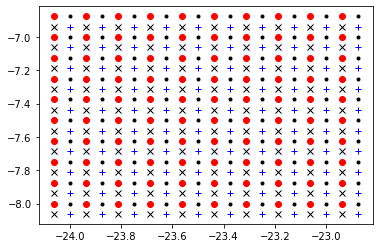

In [21]:
plt.plot(XP[:10,:10],YP[:10,:10],'k.')
plt.plot(XU[:10,:10],YU[:10,:10],'ro')
plt.plot(XV[:10,:10],YV[:10,:10],'b+')
plt.plot(XZ[:10,:10],YZ[:10,:10],'kx')
plt.show()

### Set parameters

In [22]:
g=1.
depth = 1.

### Set time step and interval

In [36]:
nt = 8000+1 # number of timesteps
dt = .01 # timestep interval
CFDtest =  0.1*min(dxx, dyy)/np.sqrt(g*depth) # test to see if dt is less than CFD limit
print(CFDtest,dt)
print(nt*dt)
snapfreq = 100 # how often to plot or print energy/enstrophy
print('How many time steps will plot (not including IC): ',(nt-1)/snapfreq)

[[0.0125 0.0125 0.0125 ... 0.0125 0.0125 0.0125]
 [0.0125 0.0125 0.0125 ... 0.0125 0.0125 0.0125]
 [0.0125 0.0125 0.0125 ... 0.0125 0.0125 0.0125]
 ...
 [0.0125 0.0125 0.0125 ... 0.0125 0.0125 0.0125]
 [0.0125 0.0125 0.0125 ... 0.0125 0.0125 0.0125]
 [0.0125 0.0125 0.0125 ... 0.0125 0.0125 0.0125]] 0.01
80.01
How many time steps will plot (not including IC):  80.0


### Initial conditions

In [37]:
# initialize arrays
p = np.zeros((int(nt),ny,nx))
u = np.zeros((int(nt),ny,nx+1))
v = np.zeros((int(nt),ny+1,nx))
z = np.zeros((int(nt),ny+1,nx+1))
depth = depth + np.zeros((ny,nx))
f = YZ#np.zeros((ny+1,nx+1))

print(p.shape,depth.shape)
print(u.shape,v.shape)
print(z.shape,f.shape)

(8001, 128, 384) (128, 384)
(8001, 128, 385) (8001, 129, 384)
(8001, 129, 385) (129, 385)


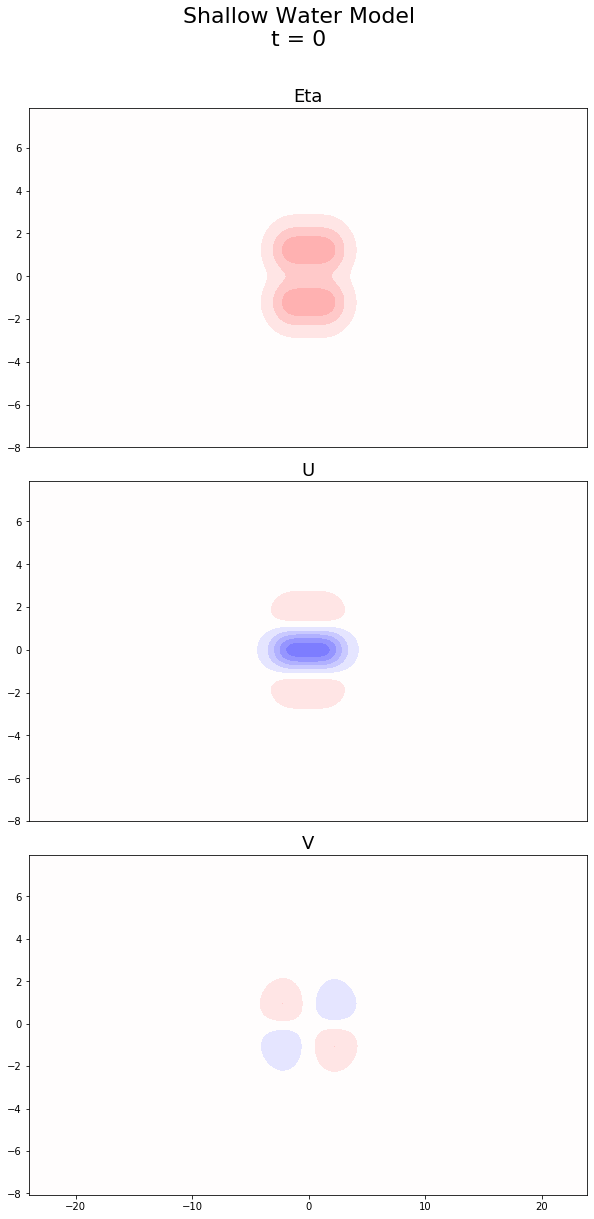

In [38]:
# standing wave
p[0],u[0],v[0] = RossbyIC(p[0],u[0],v[0],XP,YP,0.395)

UpdatePlots(0,p[0],u[0],v[0],XP,YP,XU,YU,XV,YV)

In [39]:
# initial budget
V0,energy0, enstrophy0 = calc_budget(p[0],u[0],v[0],depth+p[0],f,g,dxx,dyy)

print('Initial Energy: ',np.max(energy0))
print('Initial Enstrophy: ',np.max(enstrophy0))
print('Initial Volume: ',np.max(V0))

Initial Energy:  63.003906250012136
Initial Enstrophy:  4.065413056779095
Initial Volume:  0.04400454826987746


### Iterations

1
ΔEnergy:  9.947598300641403e-14
ΔEnstrophy:  0.0
ΔVolume:  1.5222202471666668e-05
101
ΔEnergy:  -5.229594535194337e-12
ΔEnstrophy:  2.5757174171303632e-14
ΔVolume:  0.008560066721876973
201
ΔEnergy:  -3.289812866569264e-12
ΔEnstrophy:  5.062616992290714e-14
ΔVolume:  0.014423030950523635
301
ΔEnergy:  -4.376943252282217e-12
ΔEnstrophy:  7.549516567451064e-14
ΔVolume:  0.011382228138302447
401
ΔEnergy:  4.938272013532696e-12
ΔEnstrophy:  1.0036416142611415e-13
ΔVolume:  0.005655229575136672
501
ΔEnergy:  2.1336177269404288e-10
ΔEnstrophy:  1.2612133559741778e-13
ΔVolume:  0.011171181191171678
601
ΔEnergy:  4.80731898733211e-10
ΔEnstrophy:  1.5187850976872141e-13
ΔVolume:  0.01774849079958691
701
ΔEnergy:  1.332731471848092e-07
ΔEnstrophy:  1.758593271006248e-13
ΔVolume:  0.013576805855737652
801
ΔEnergy:  1.7952096342810364e-06
ΔEnstrophy:  2.0161650127192843e-13
ΔVolume:  0.010236255612087297
901
ΔEnergy:  7.646001584760143e-06
ΔEnstrophy:  2.255973186038318e-13
ΔVolume:  0.016455404

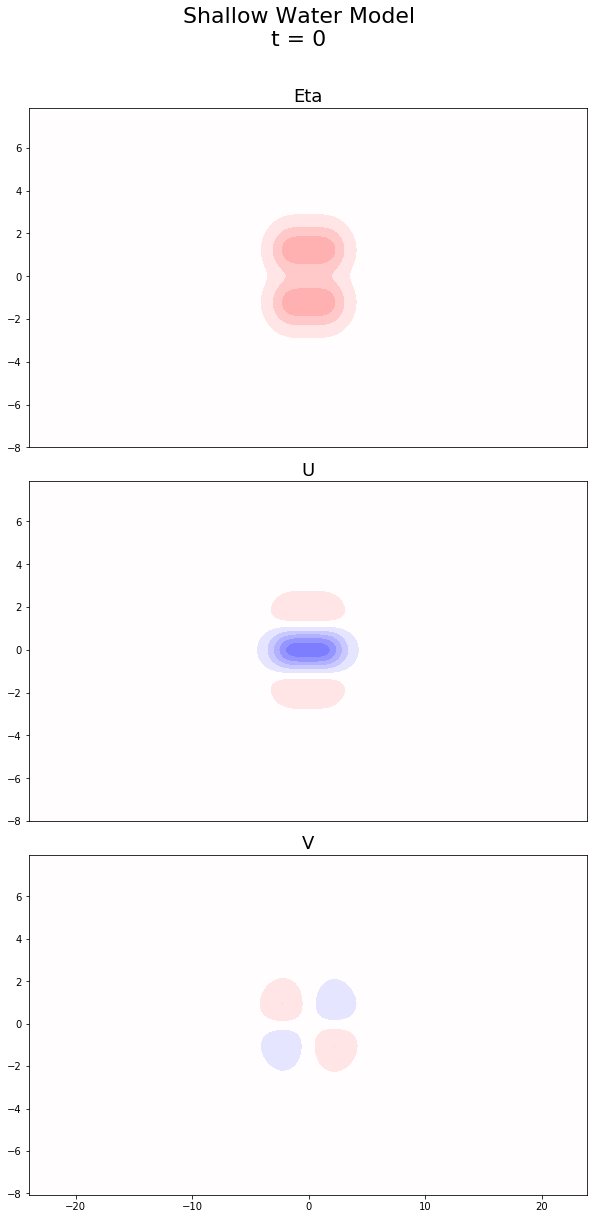

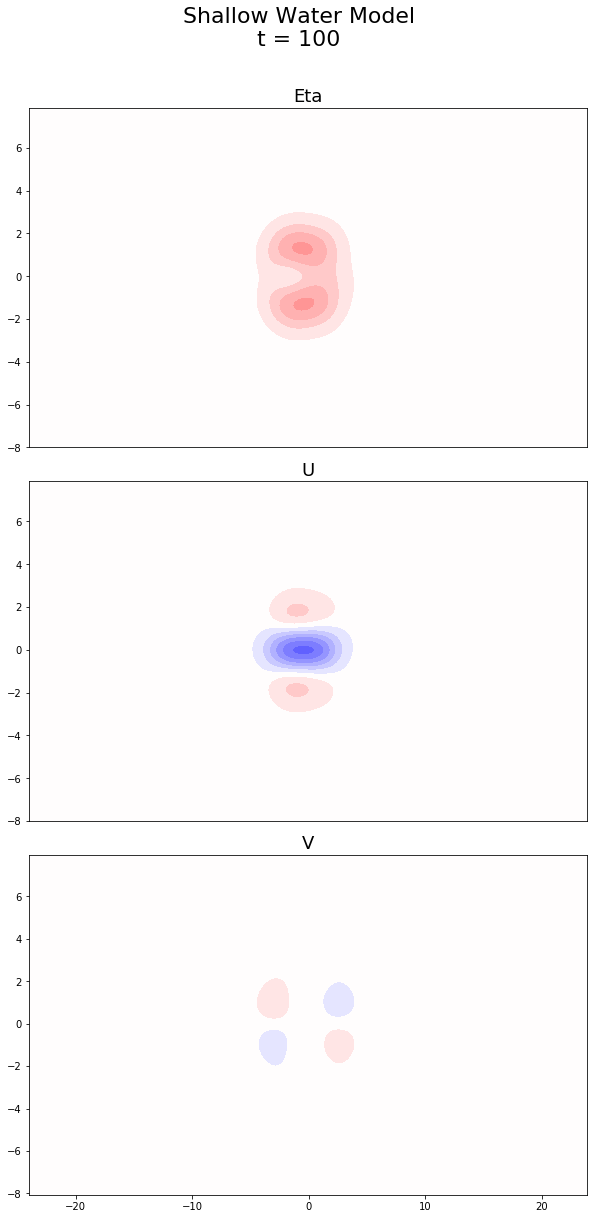

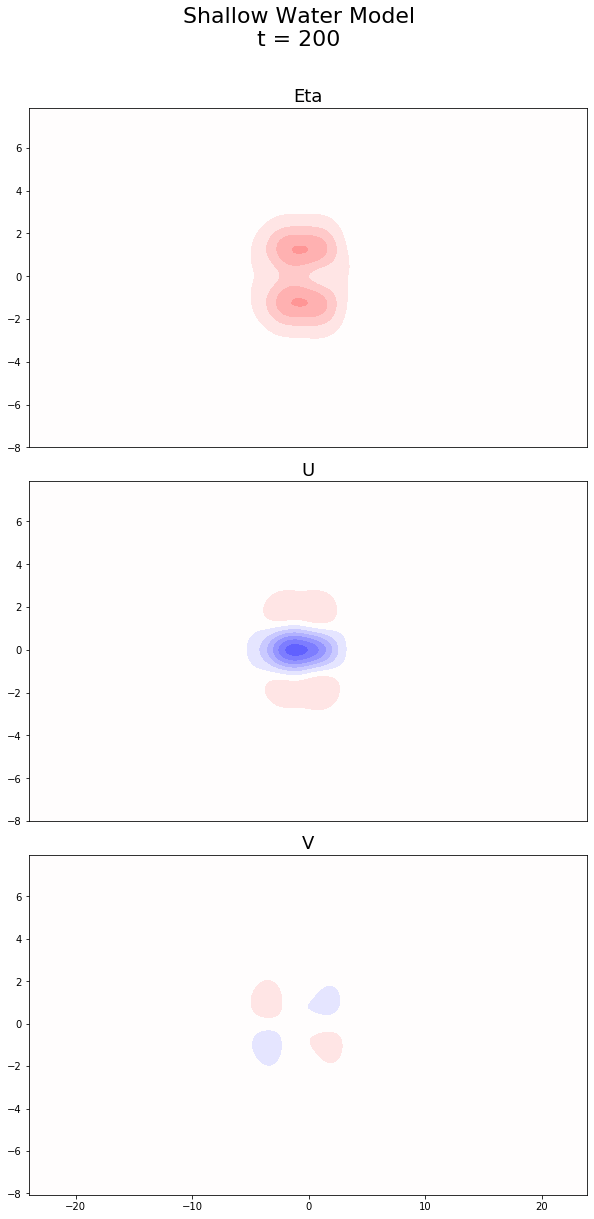

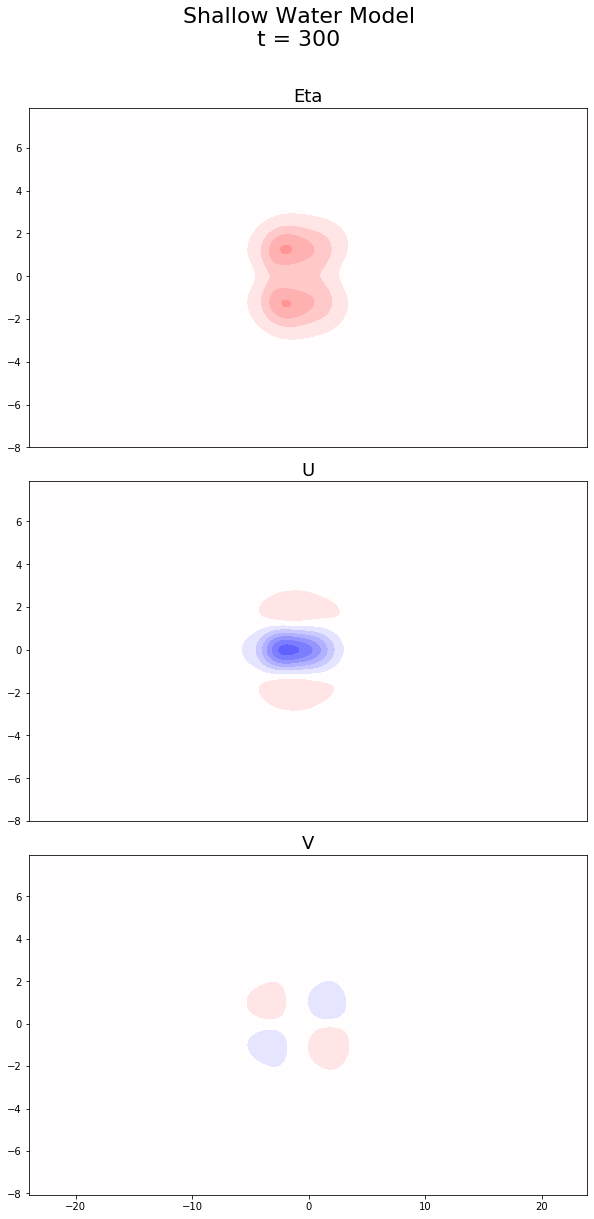

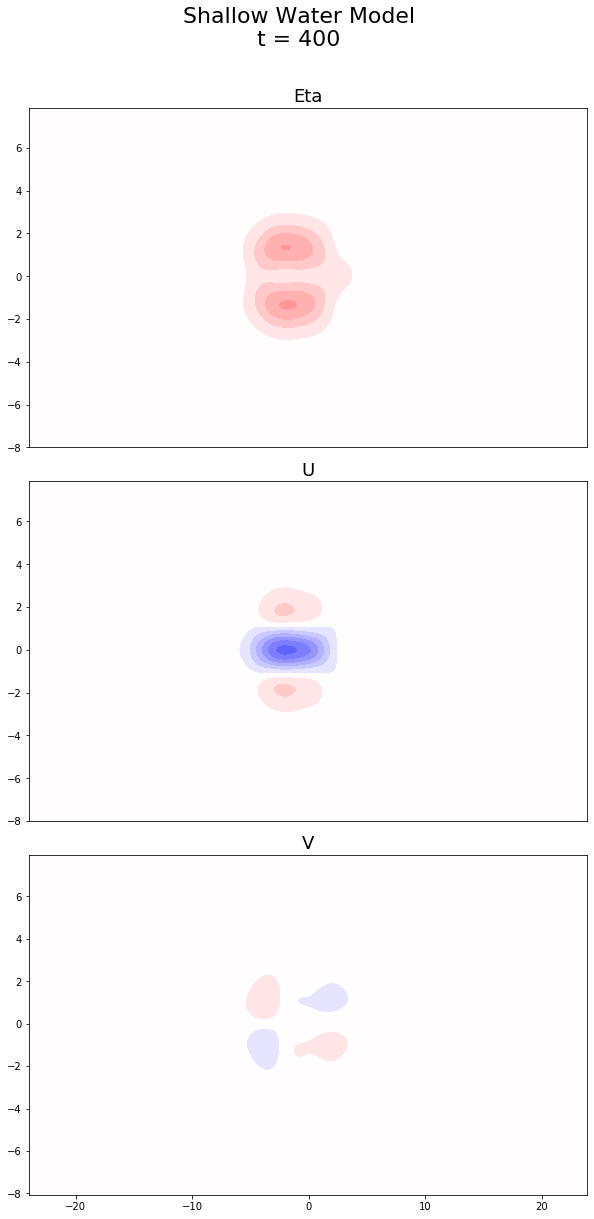

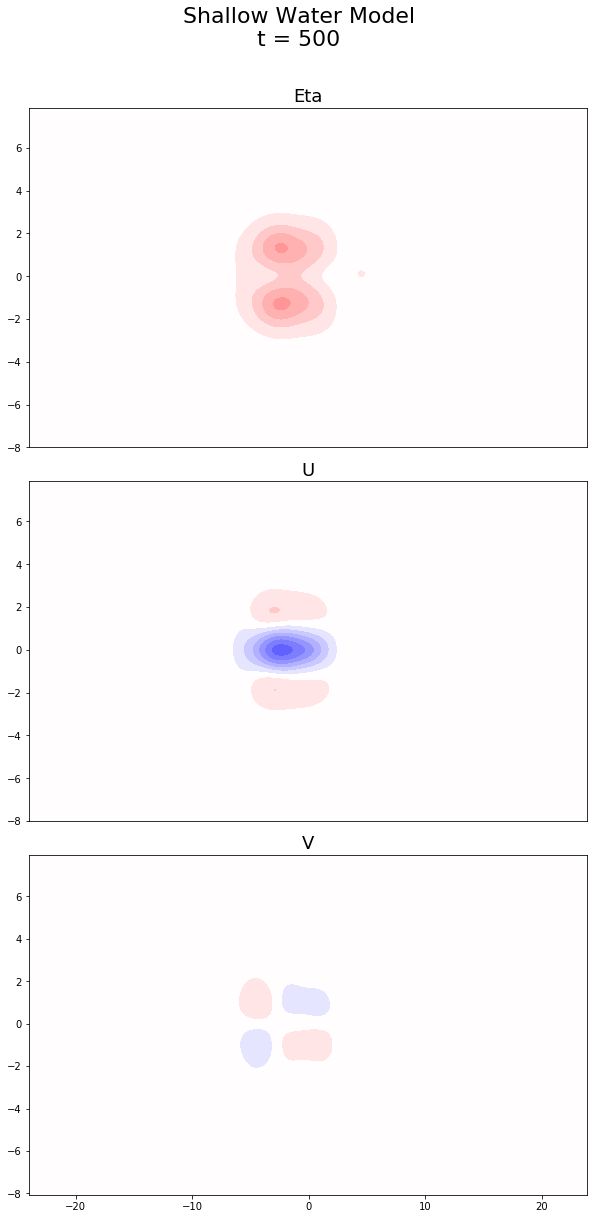

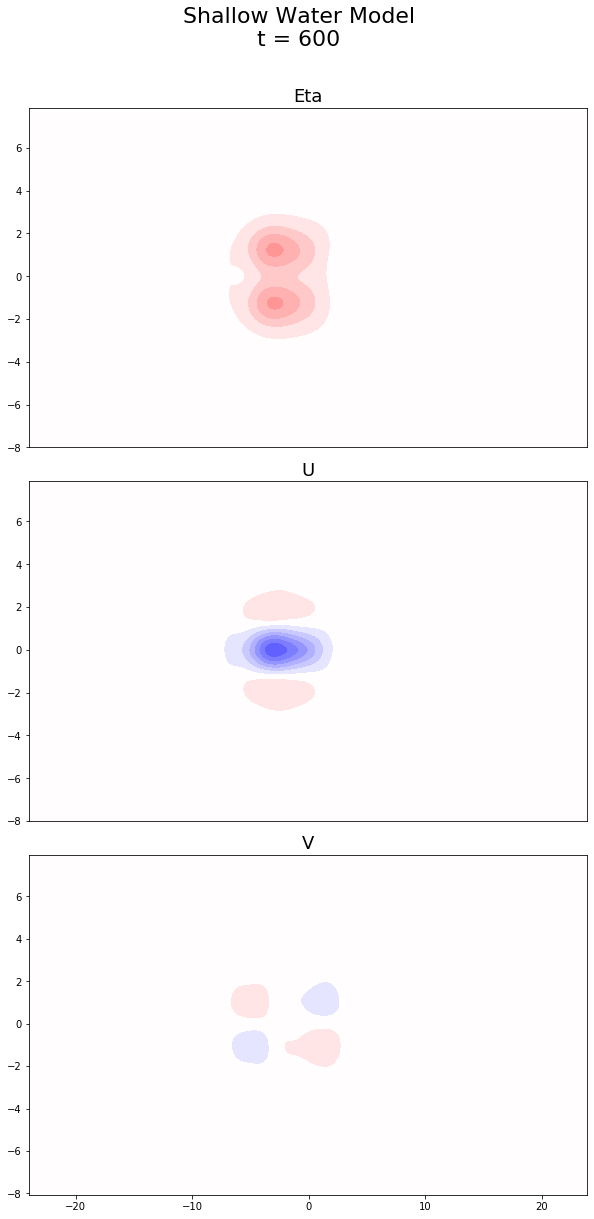

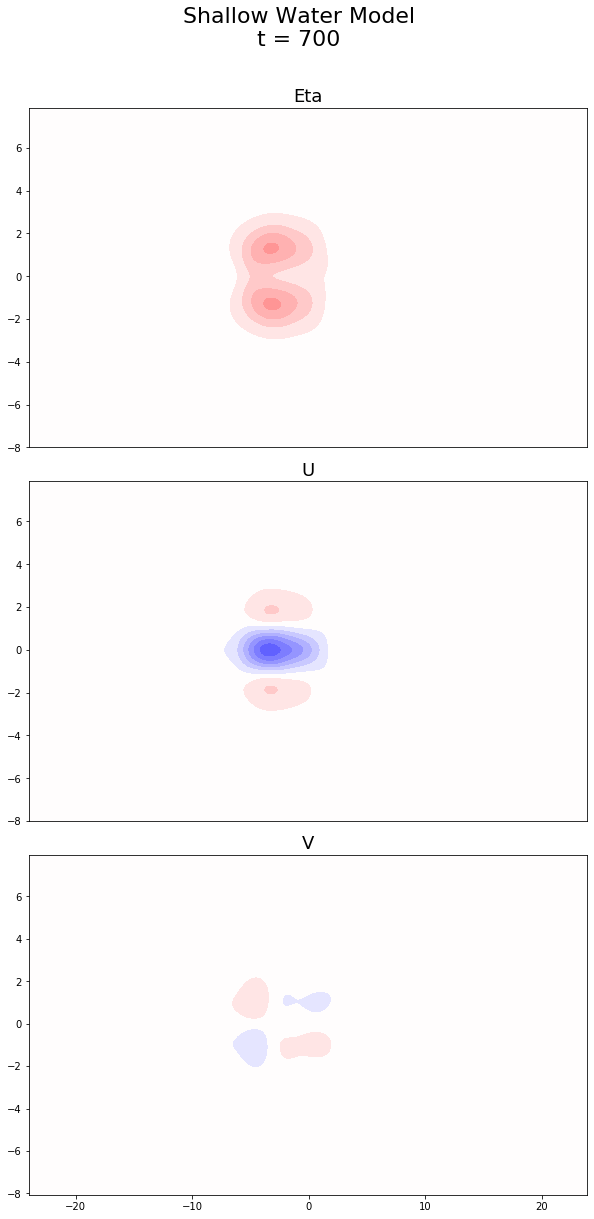

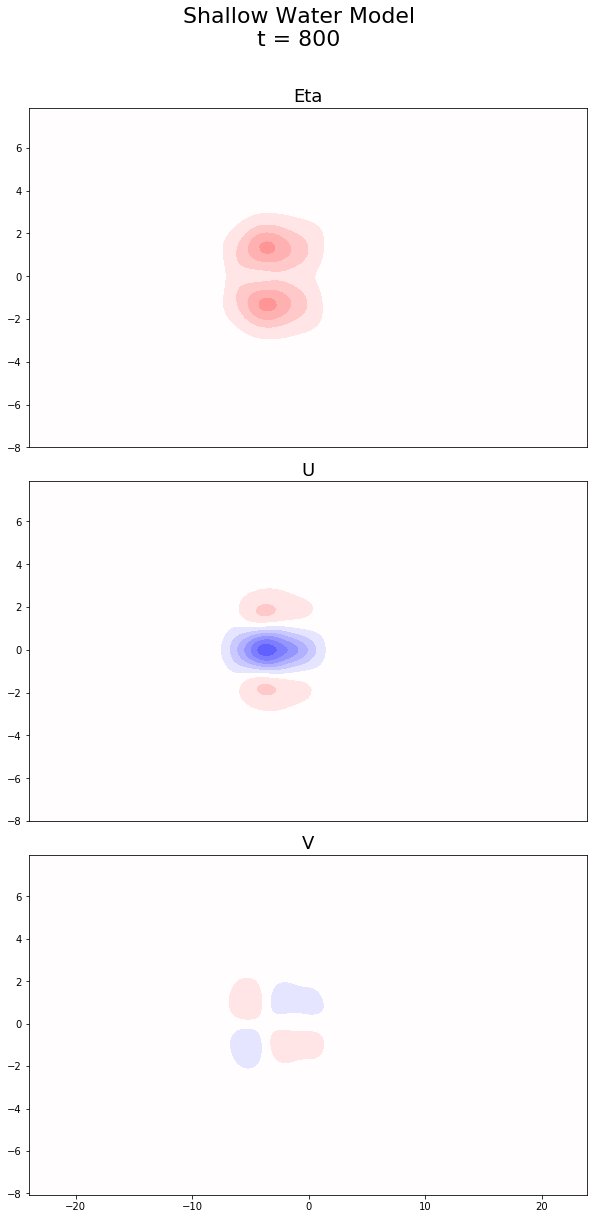

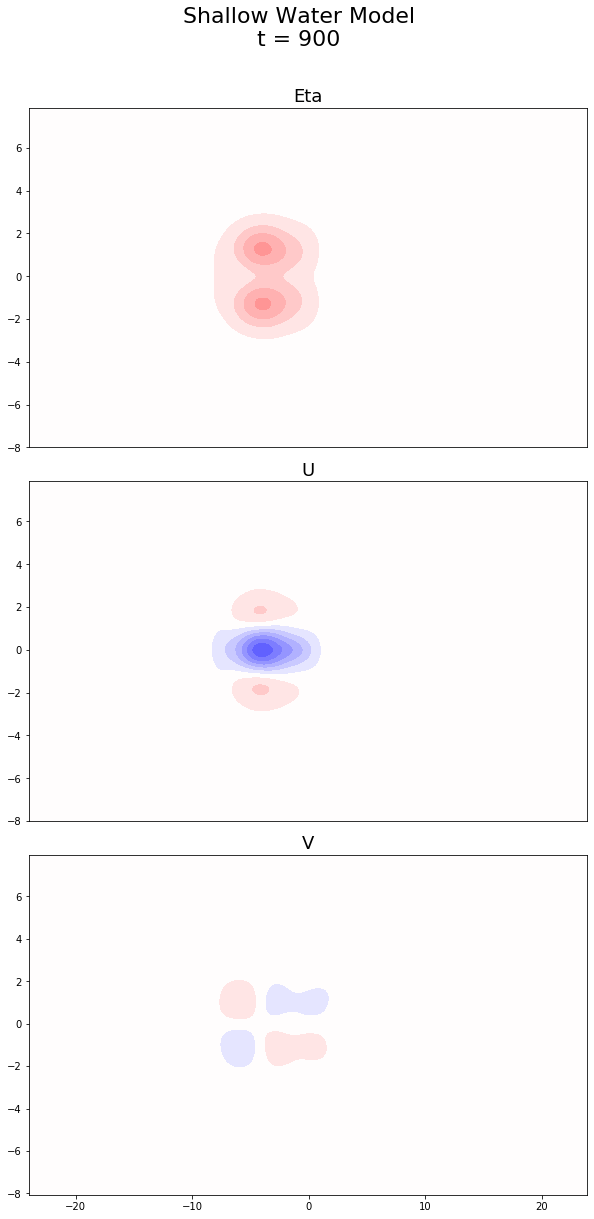

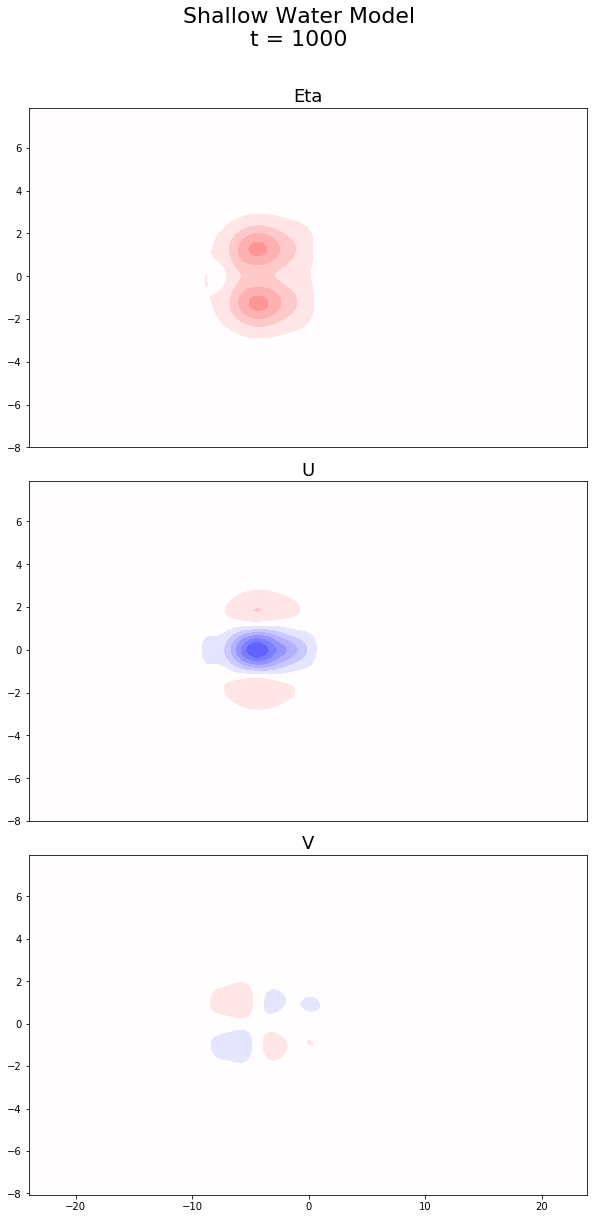

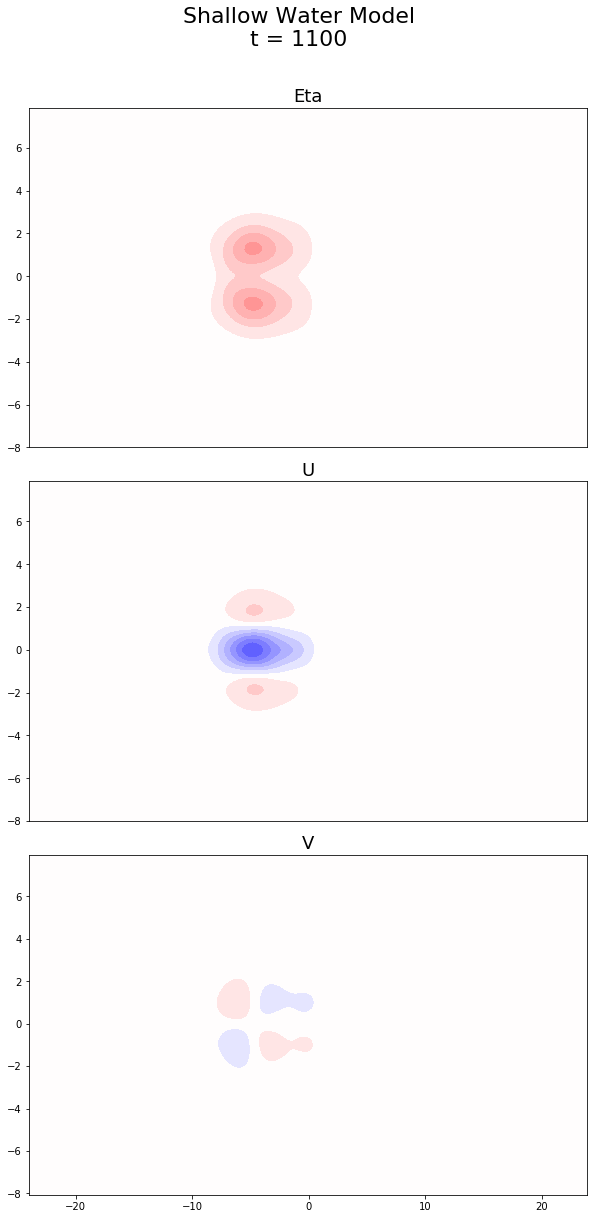

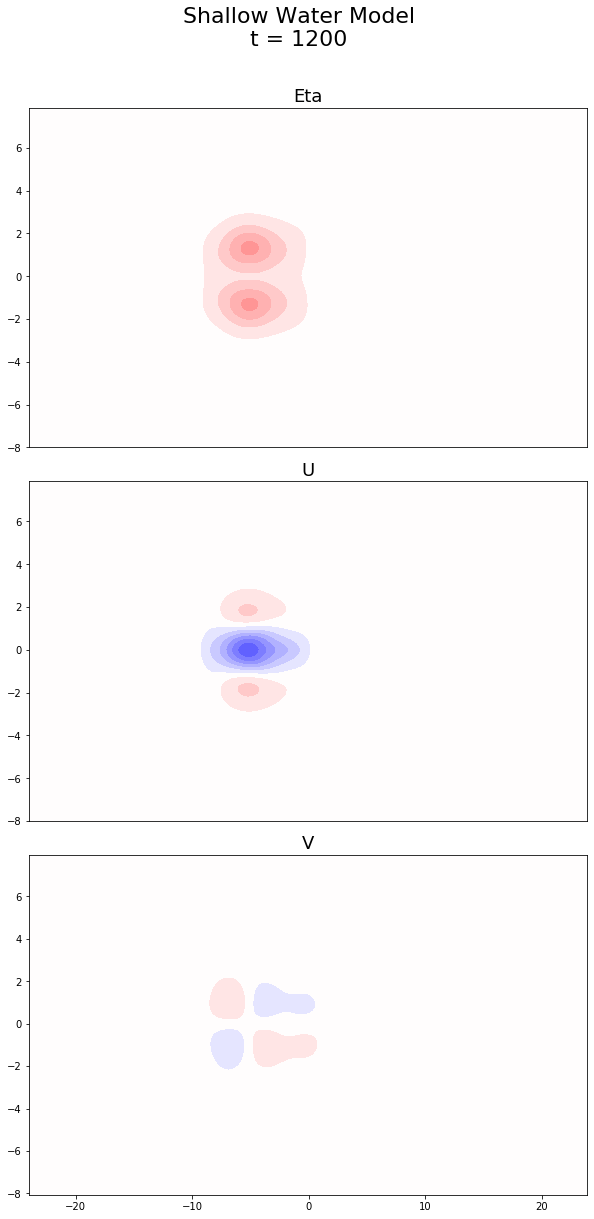

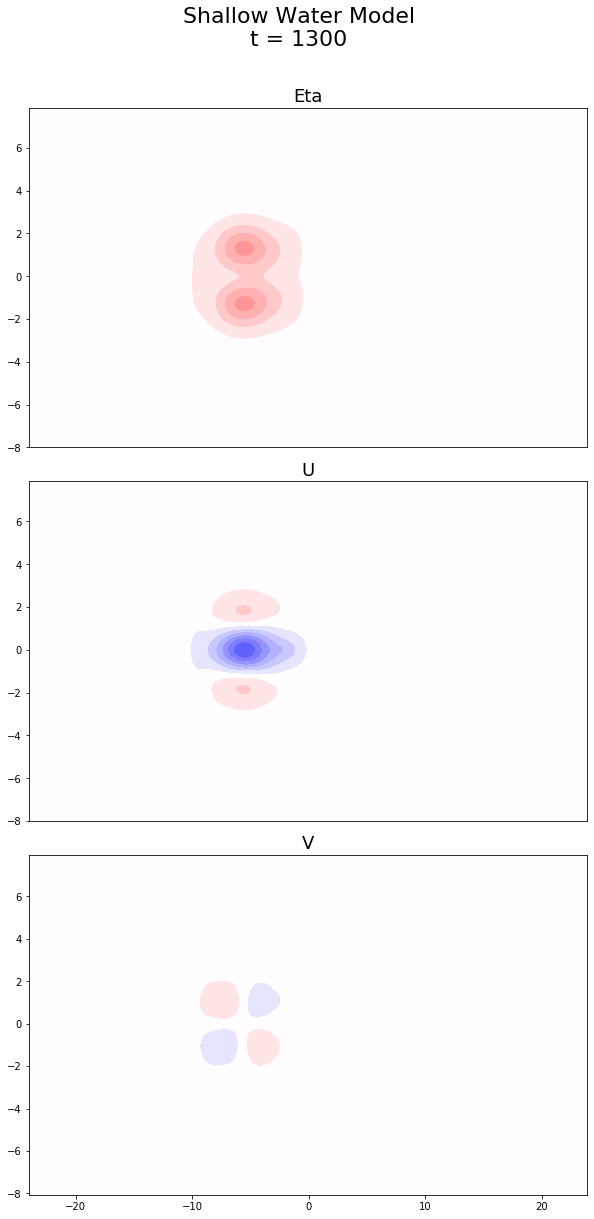

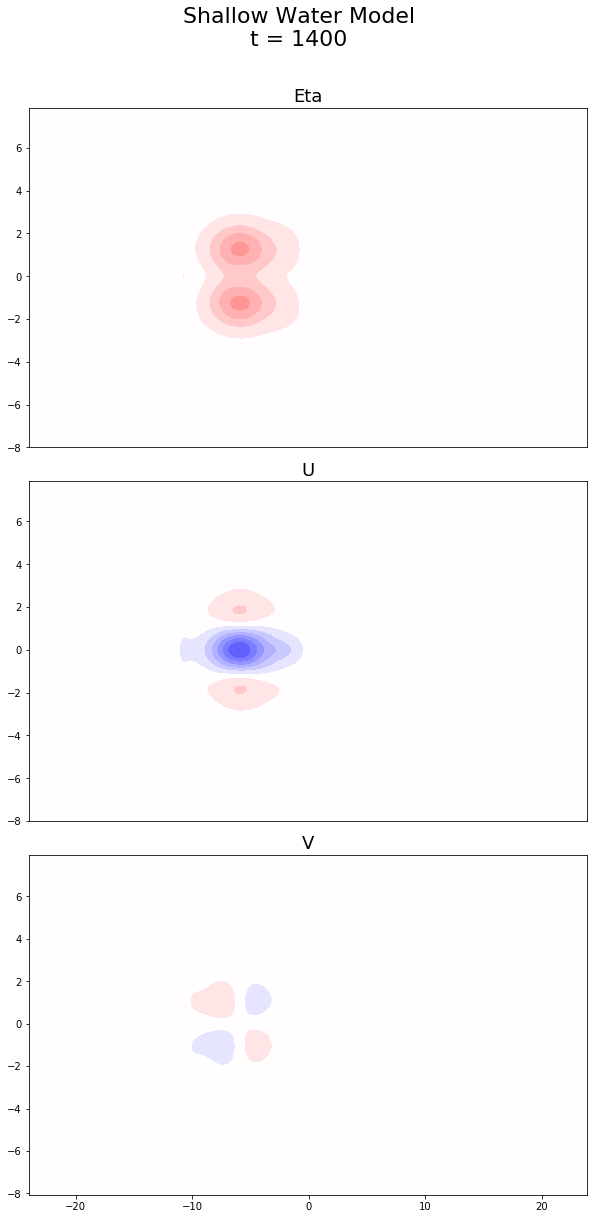

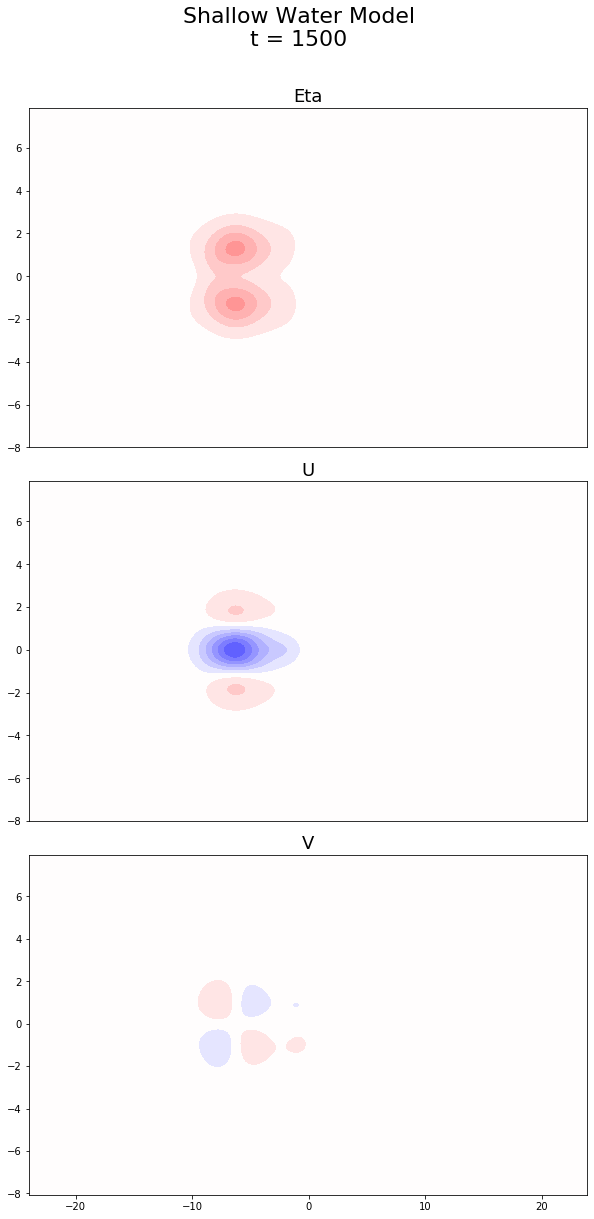

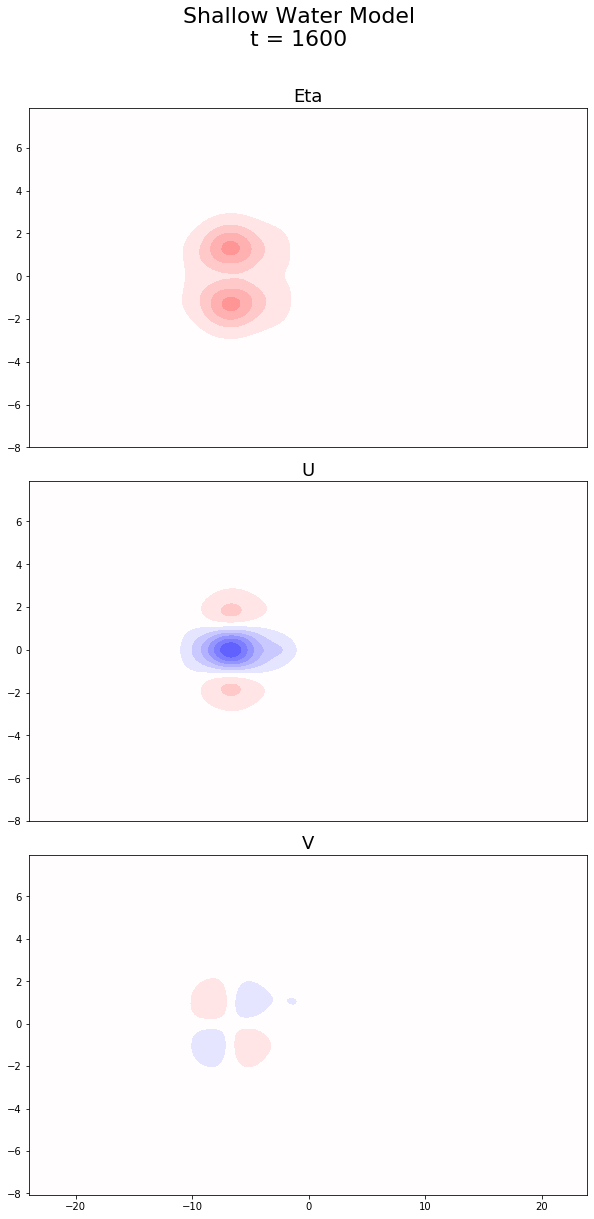

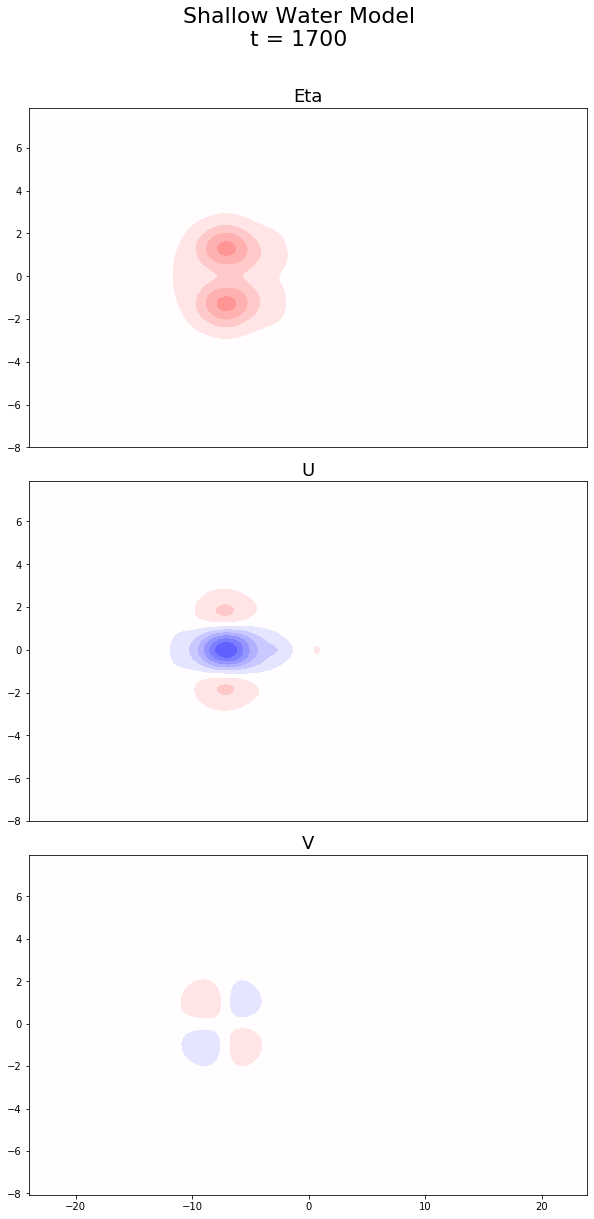

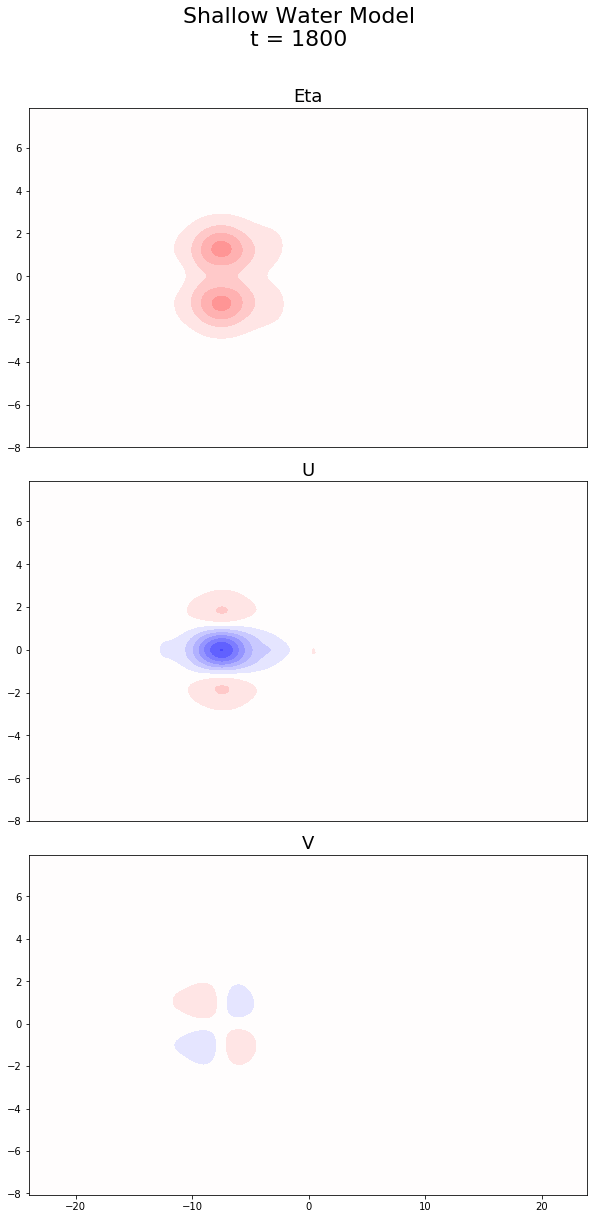

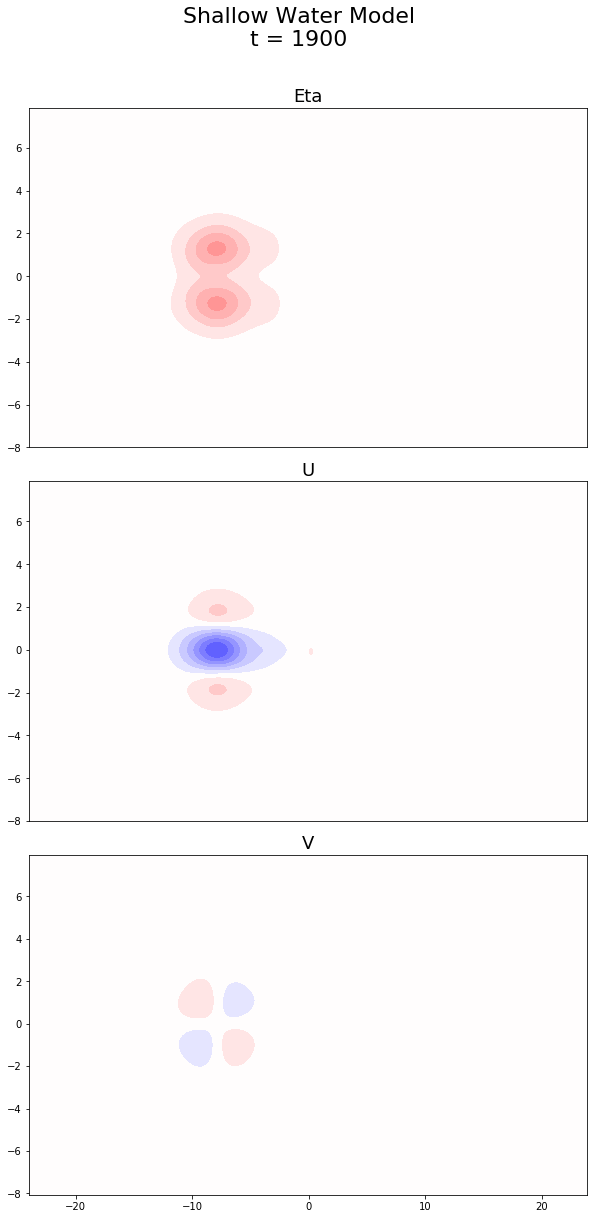

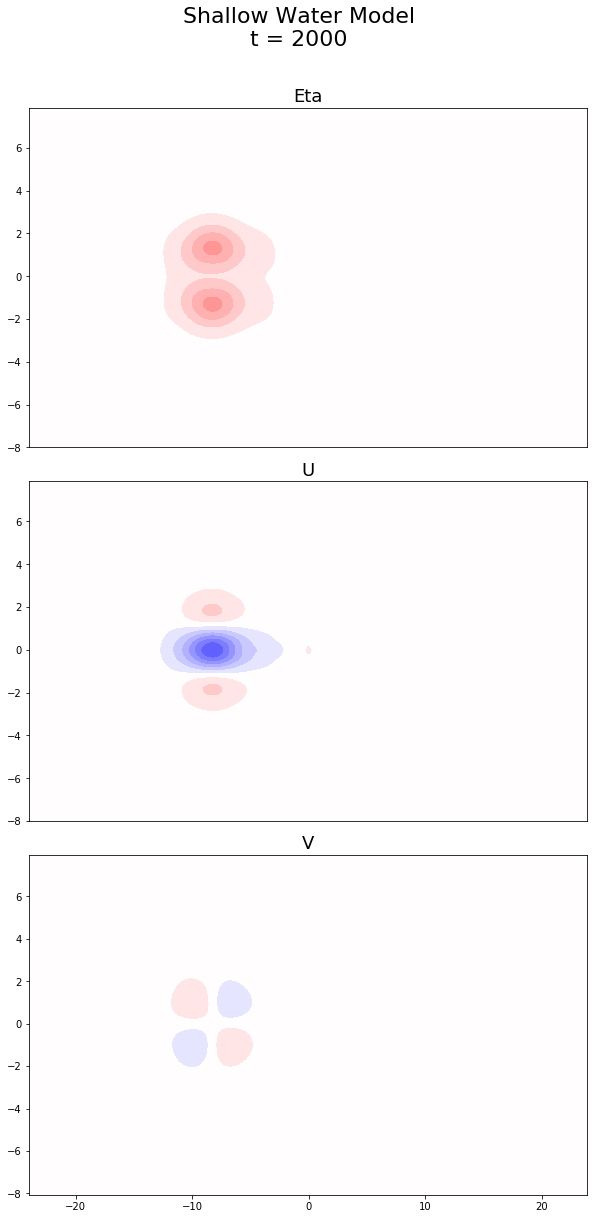

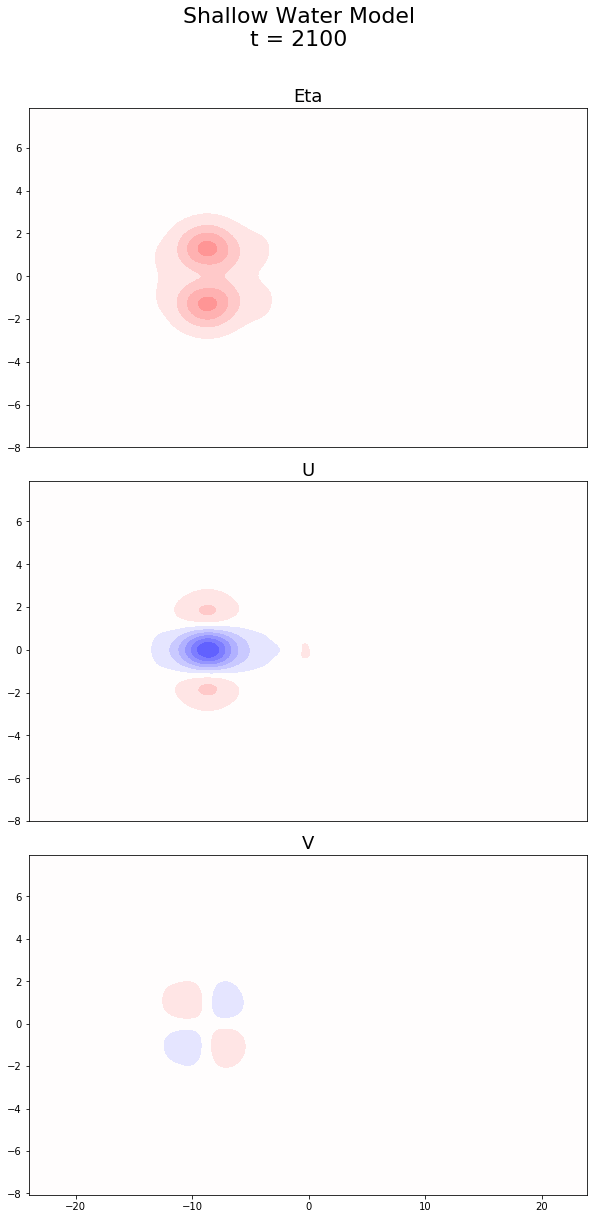

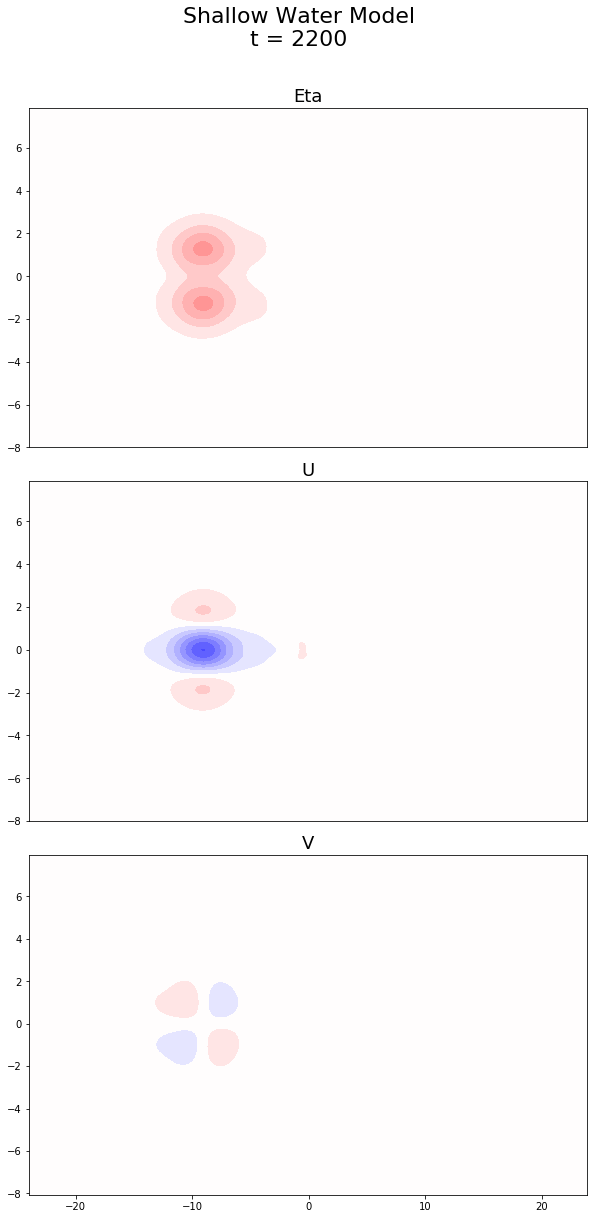

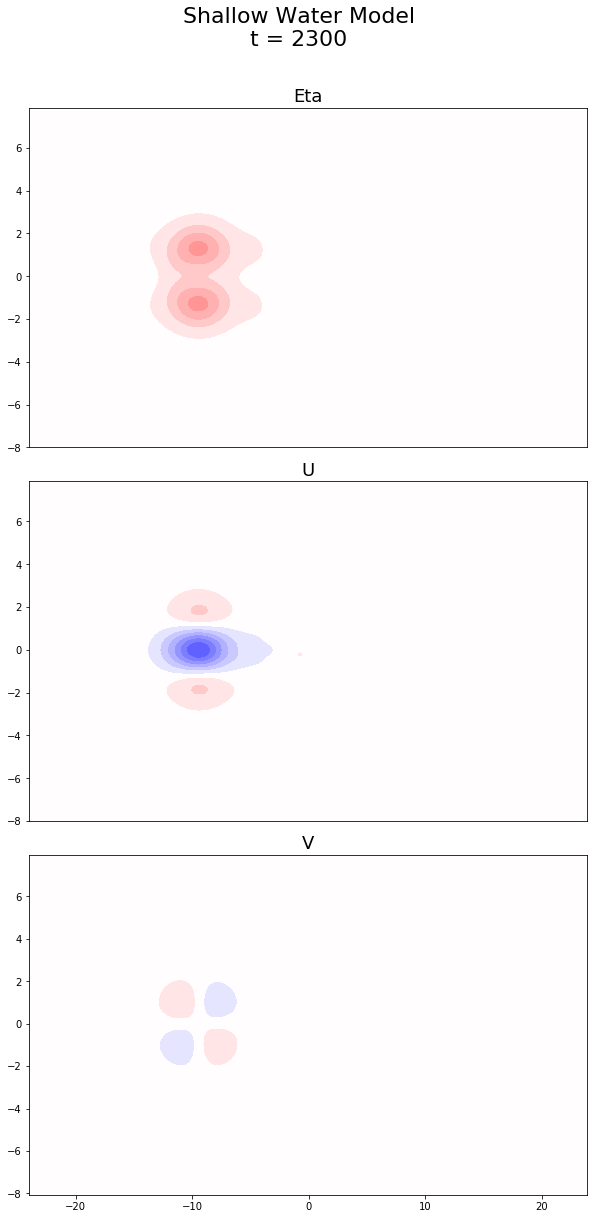

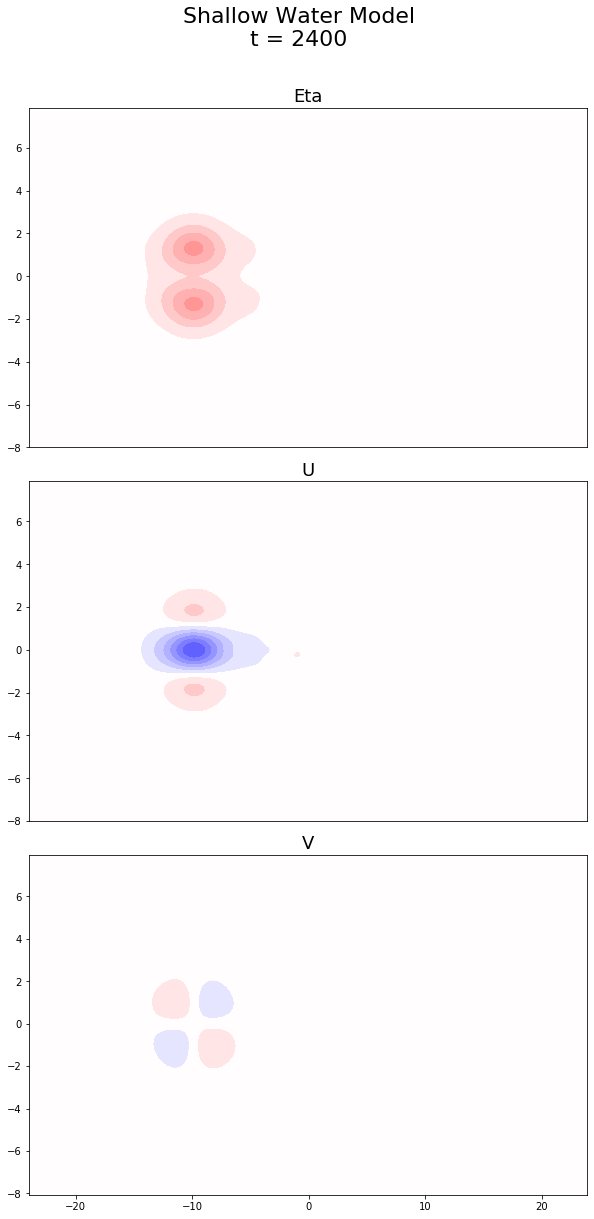

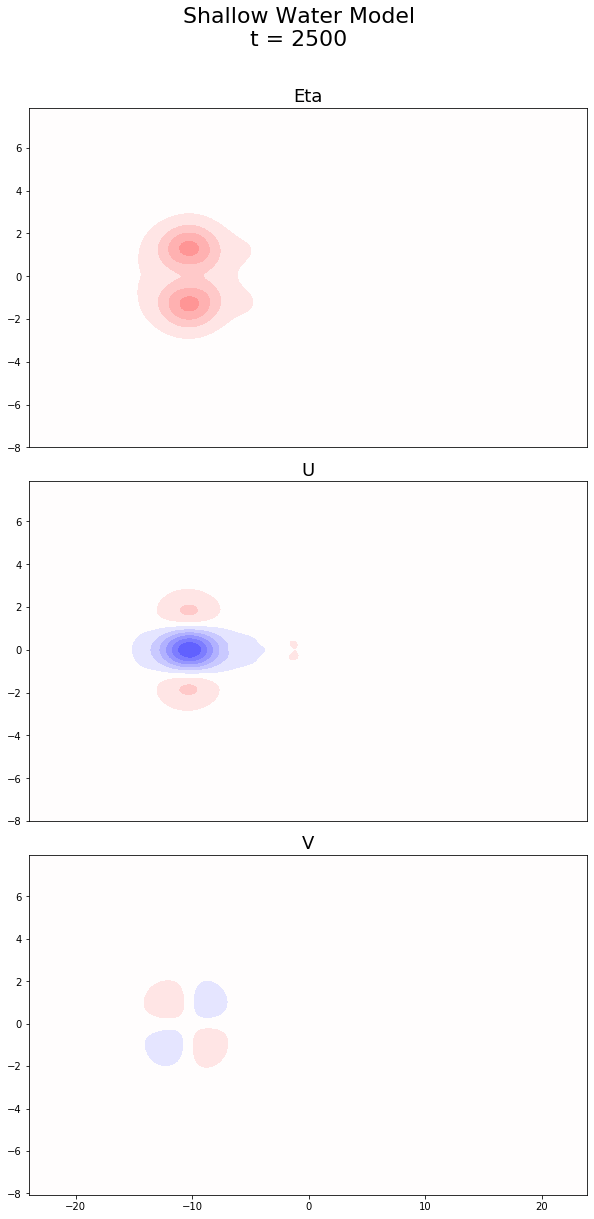

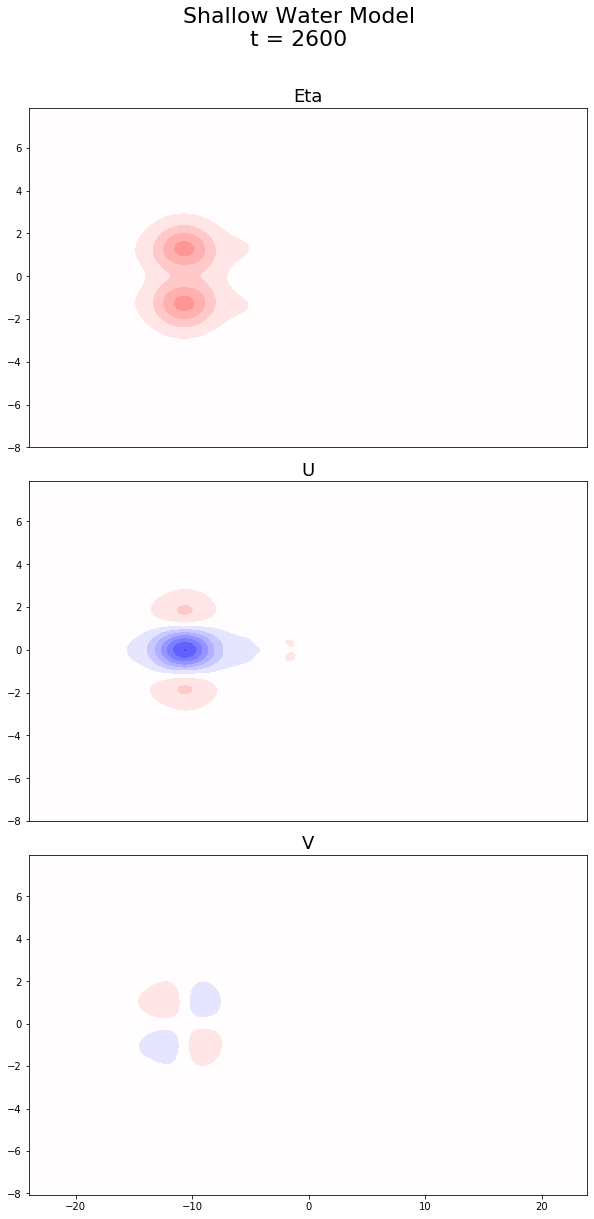

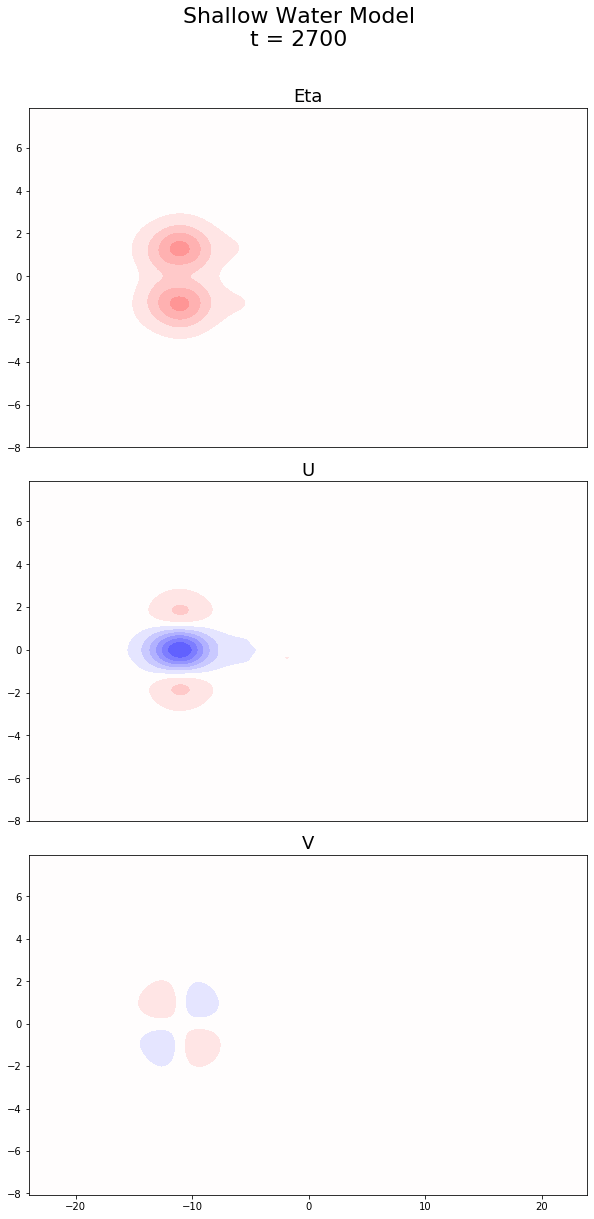

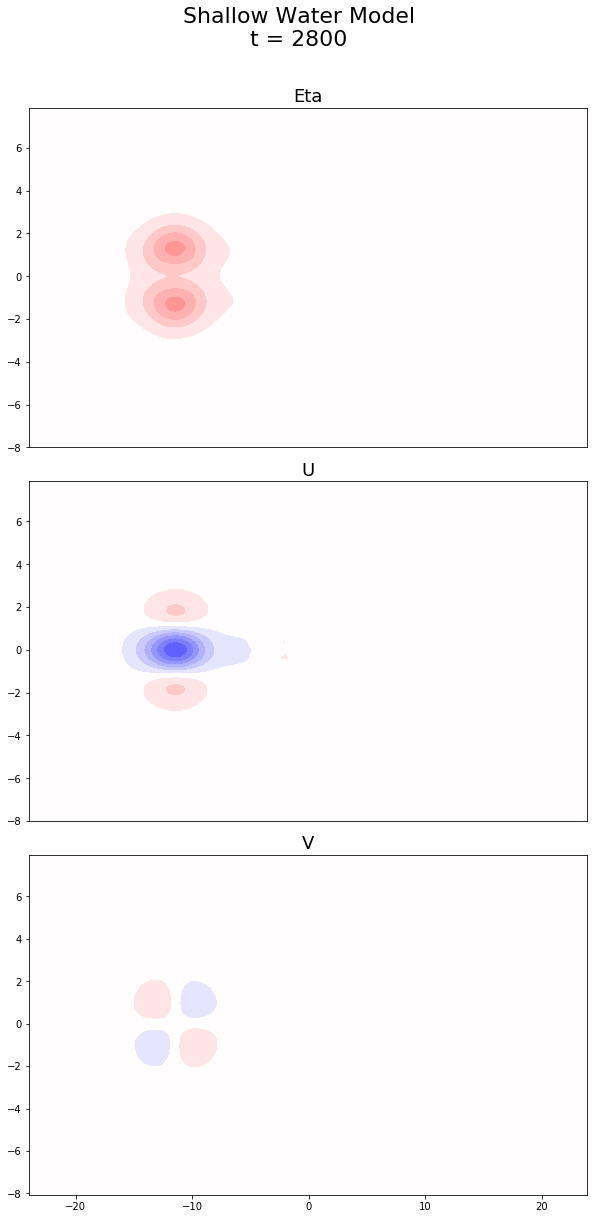

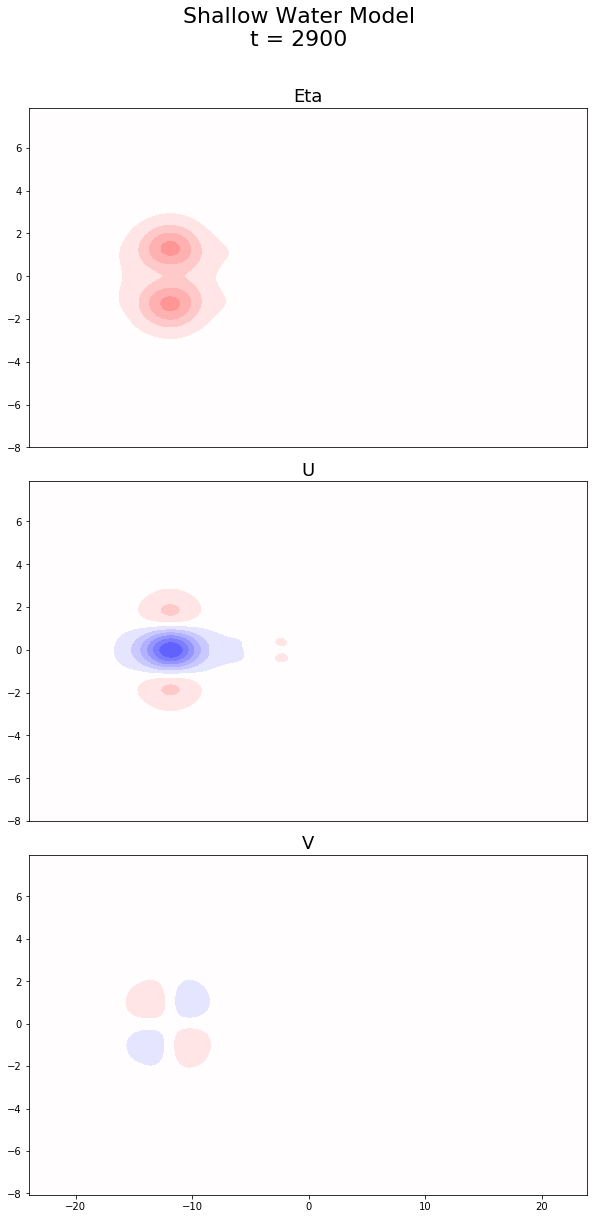

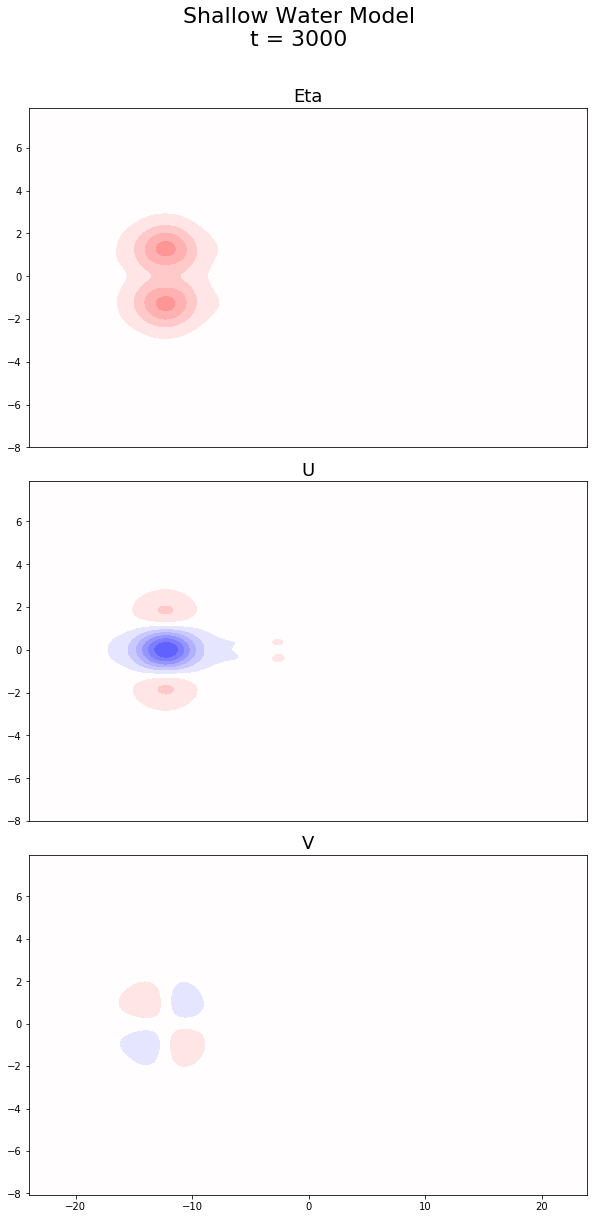

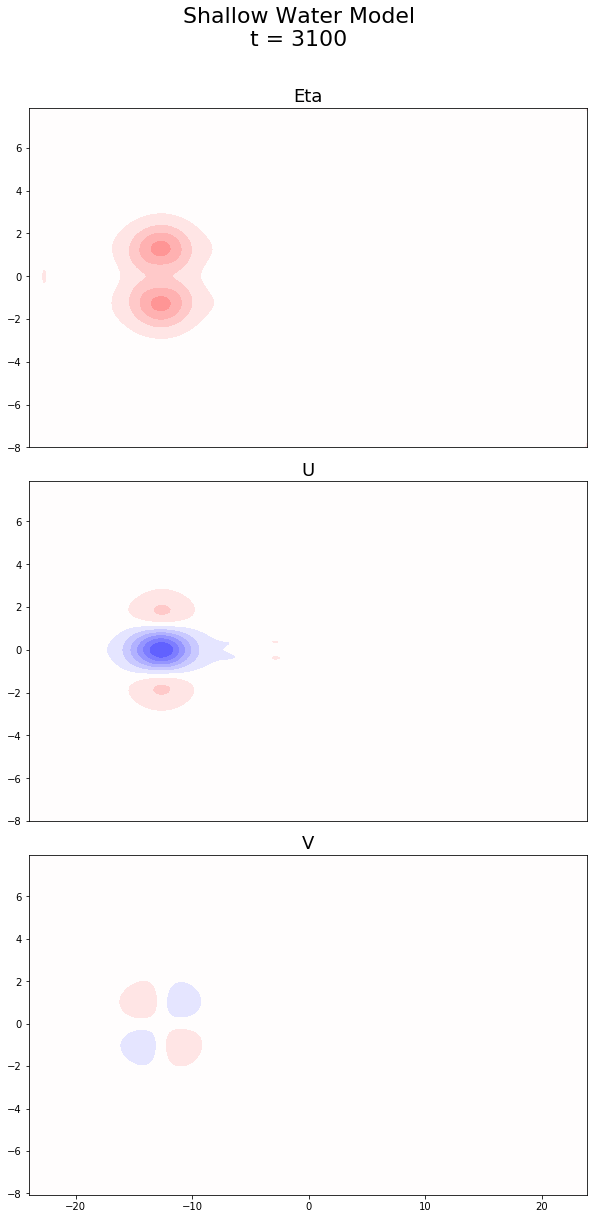

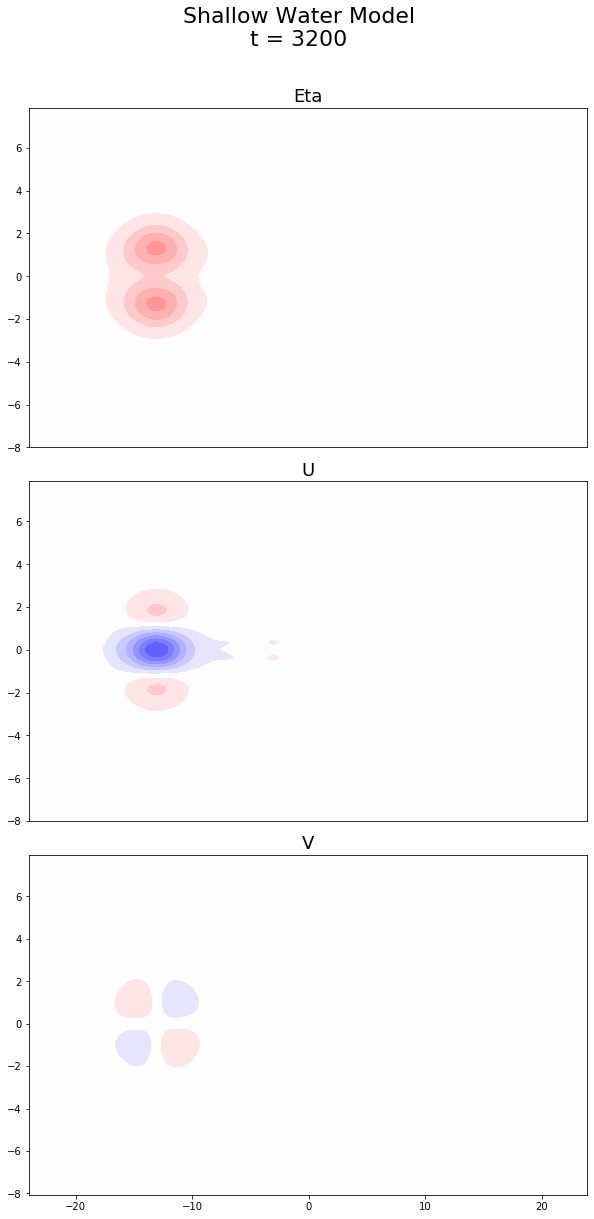

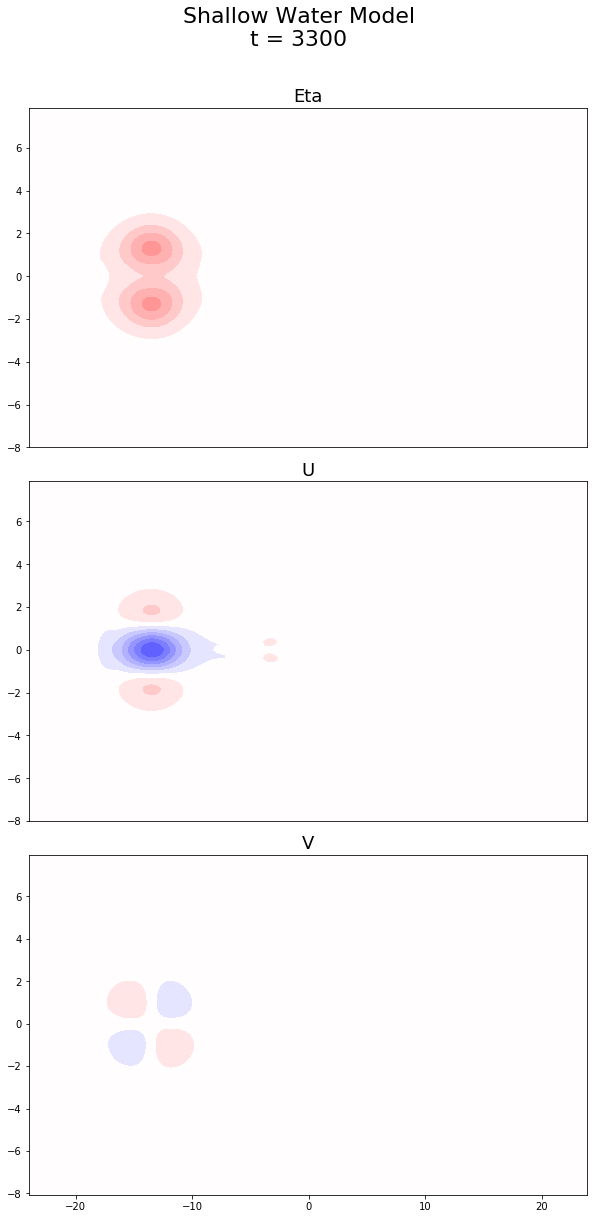

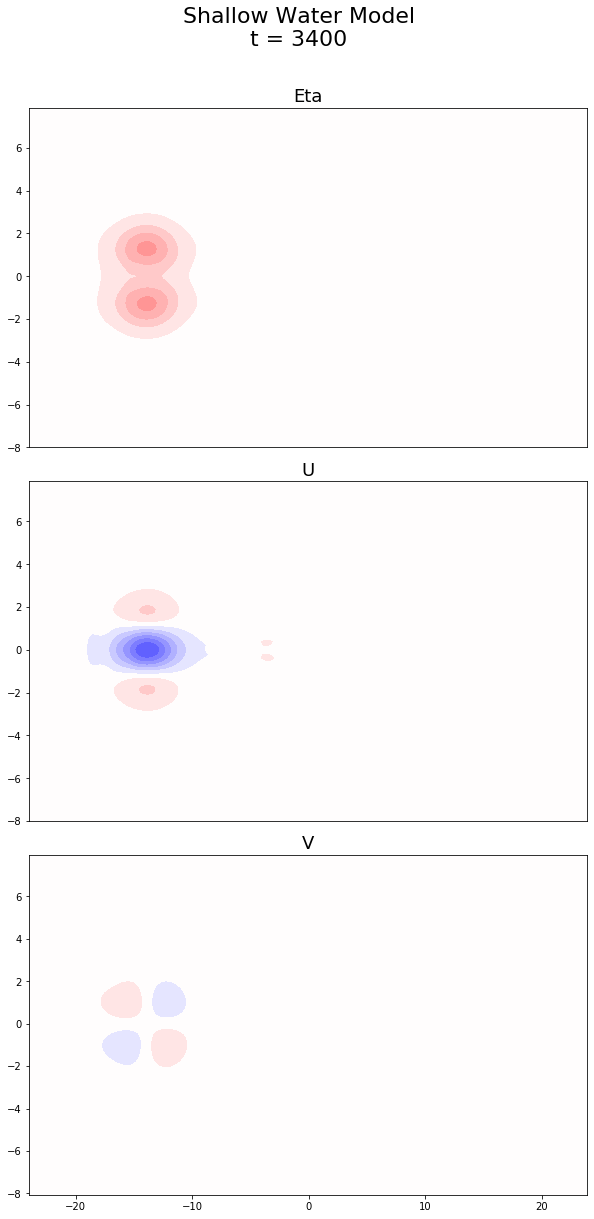

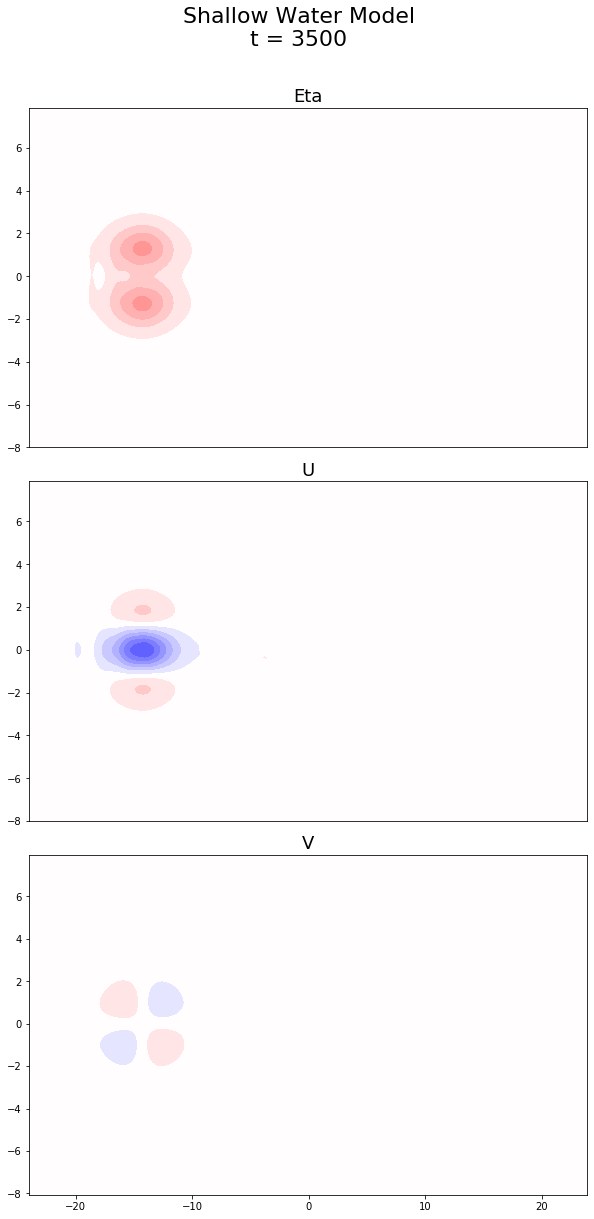

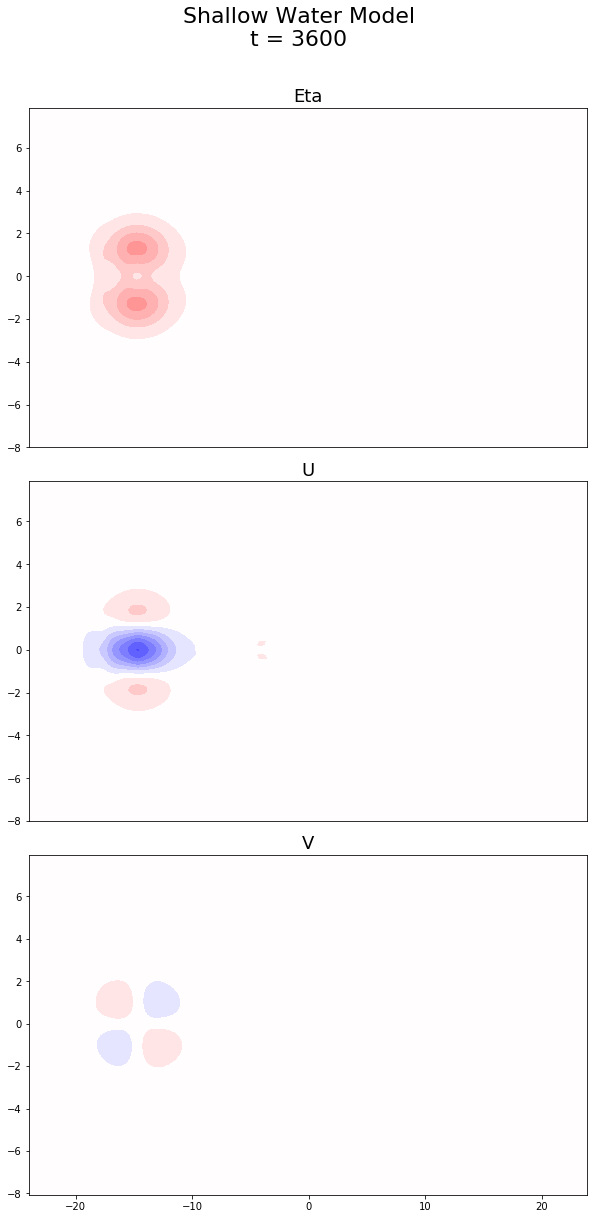

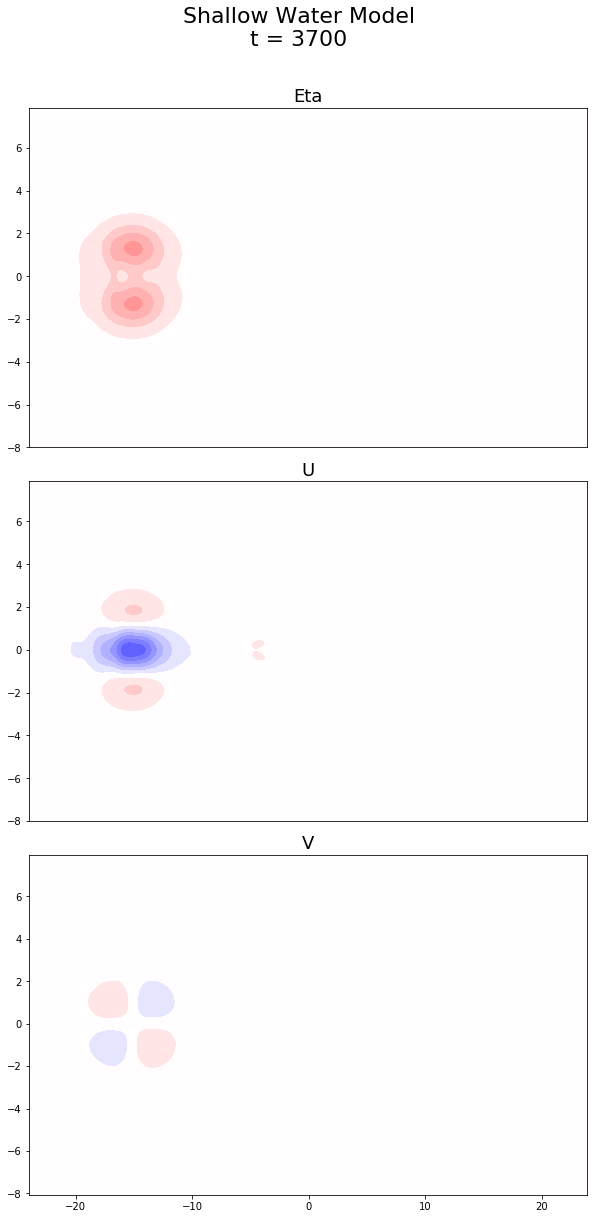

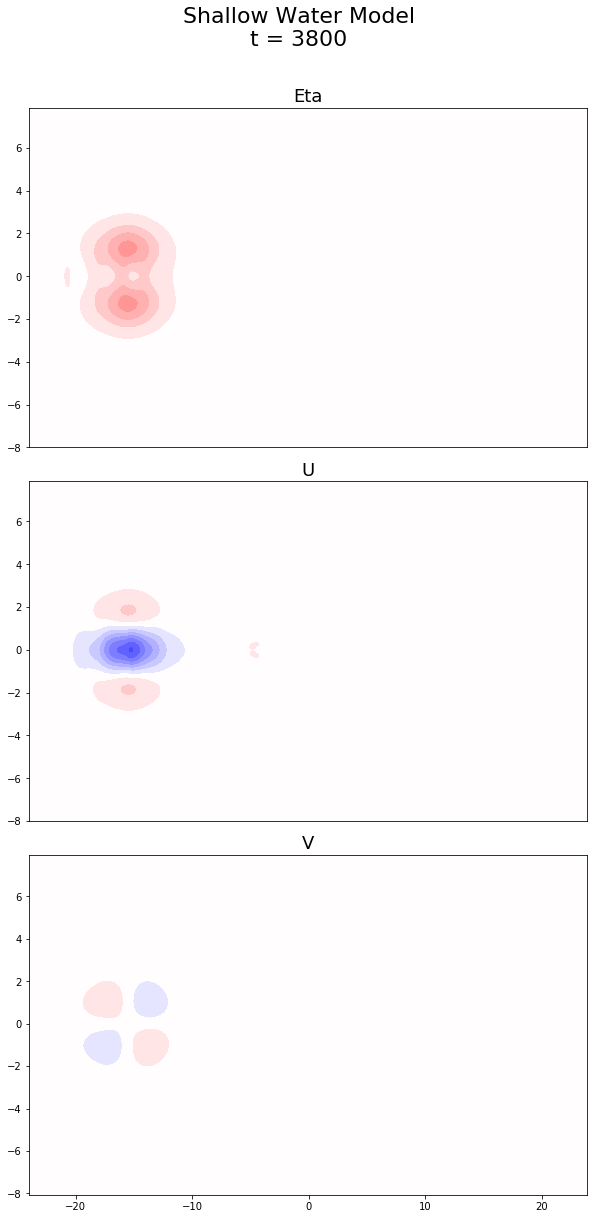

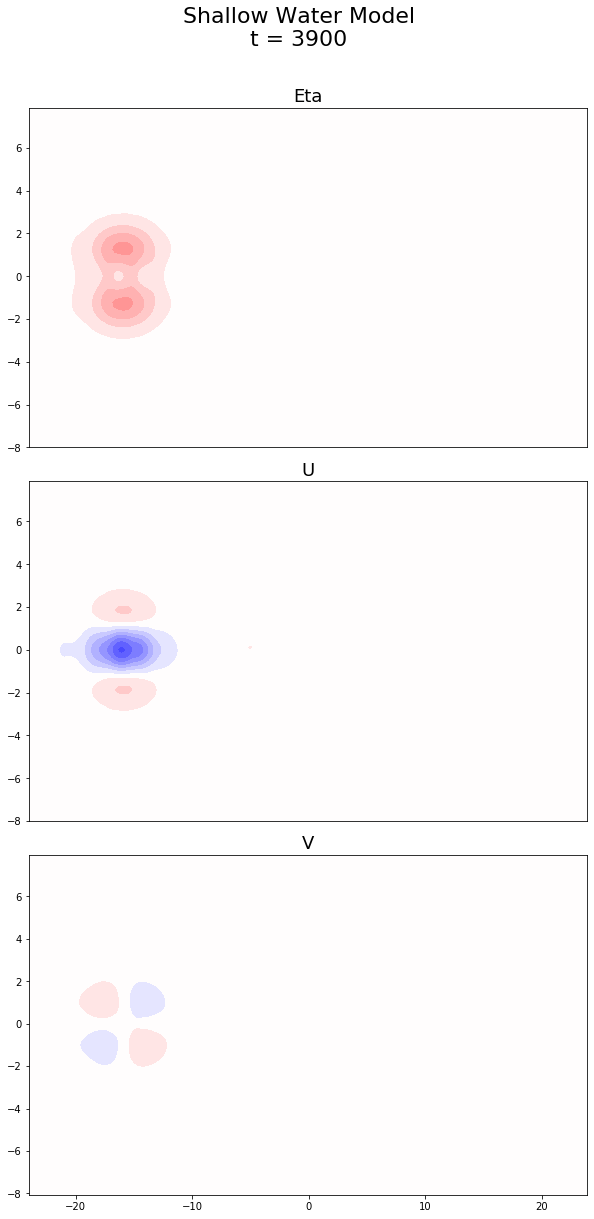

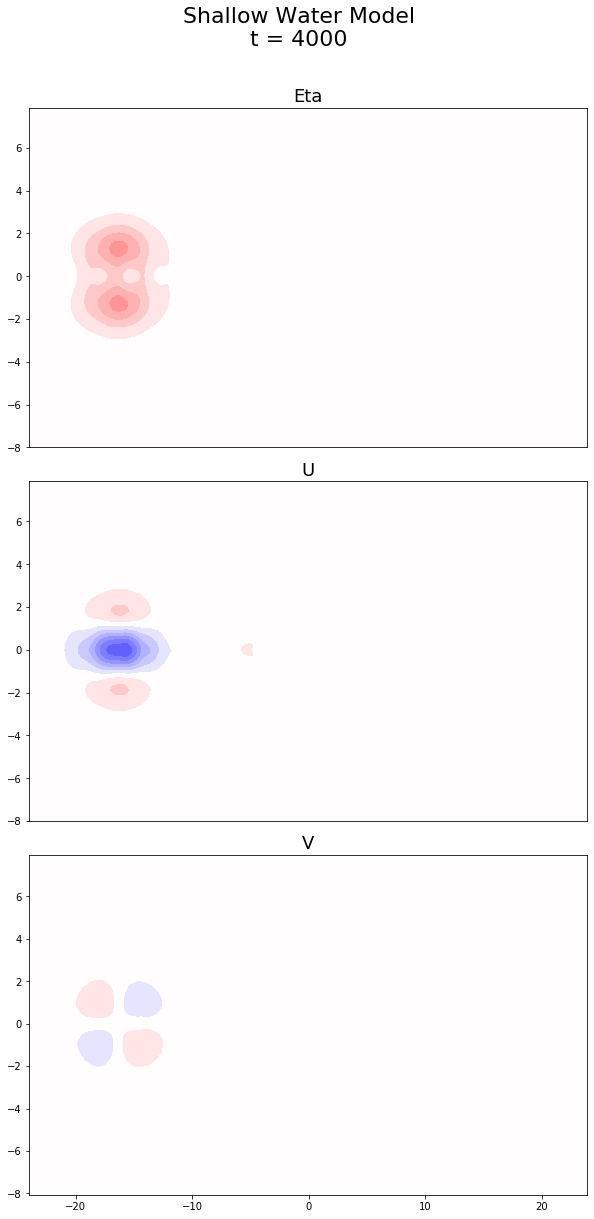

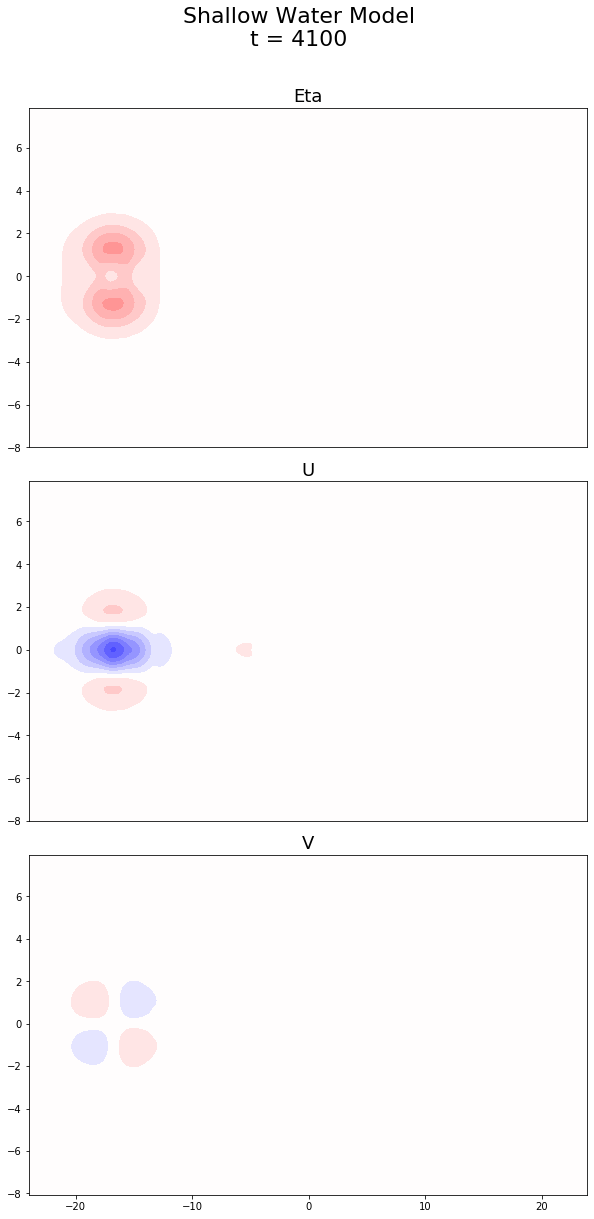

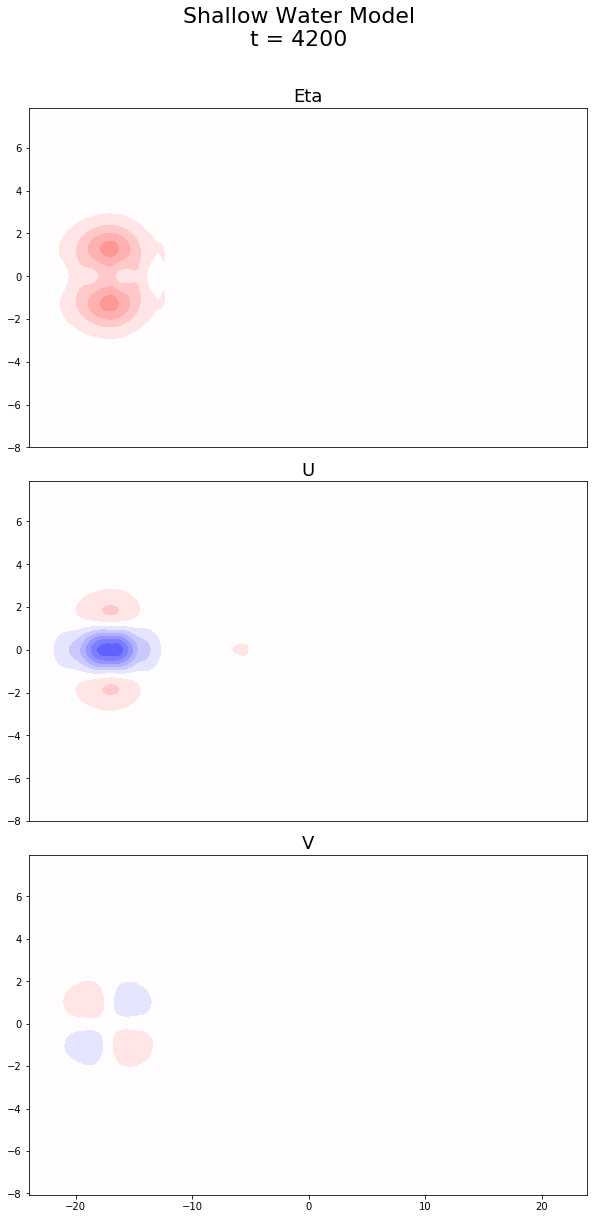

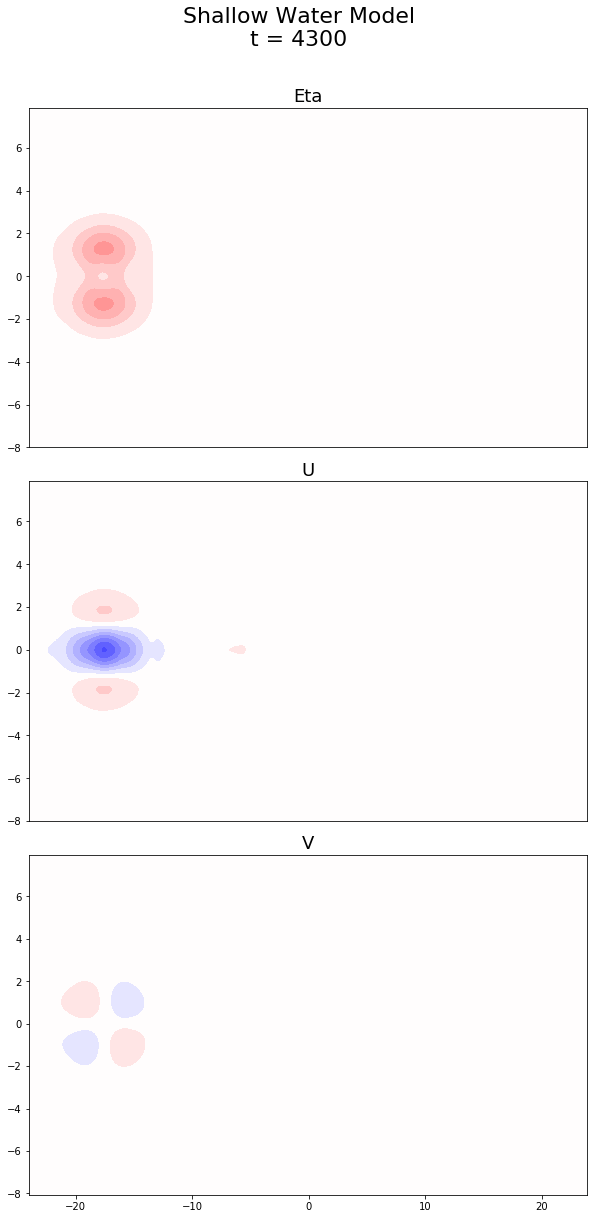

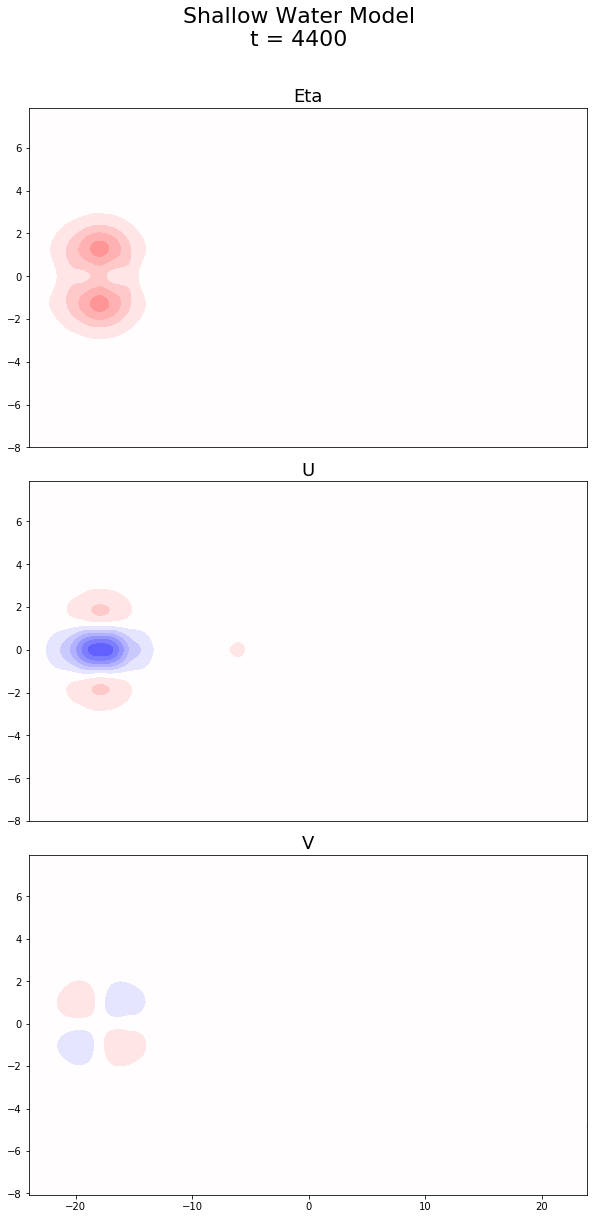

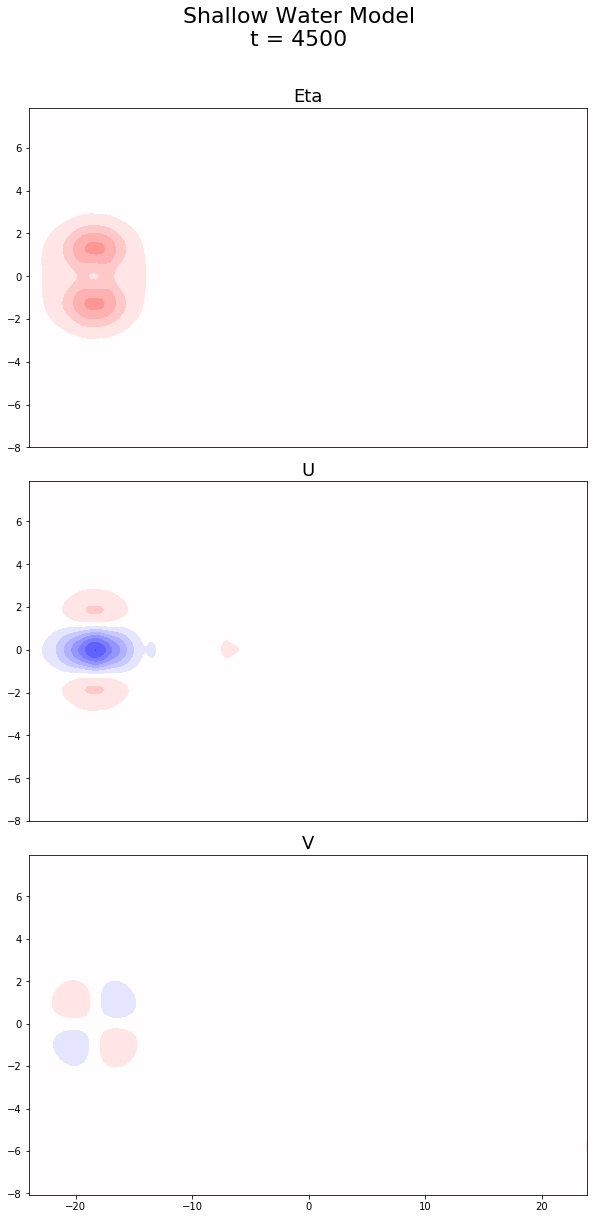

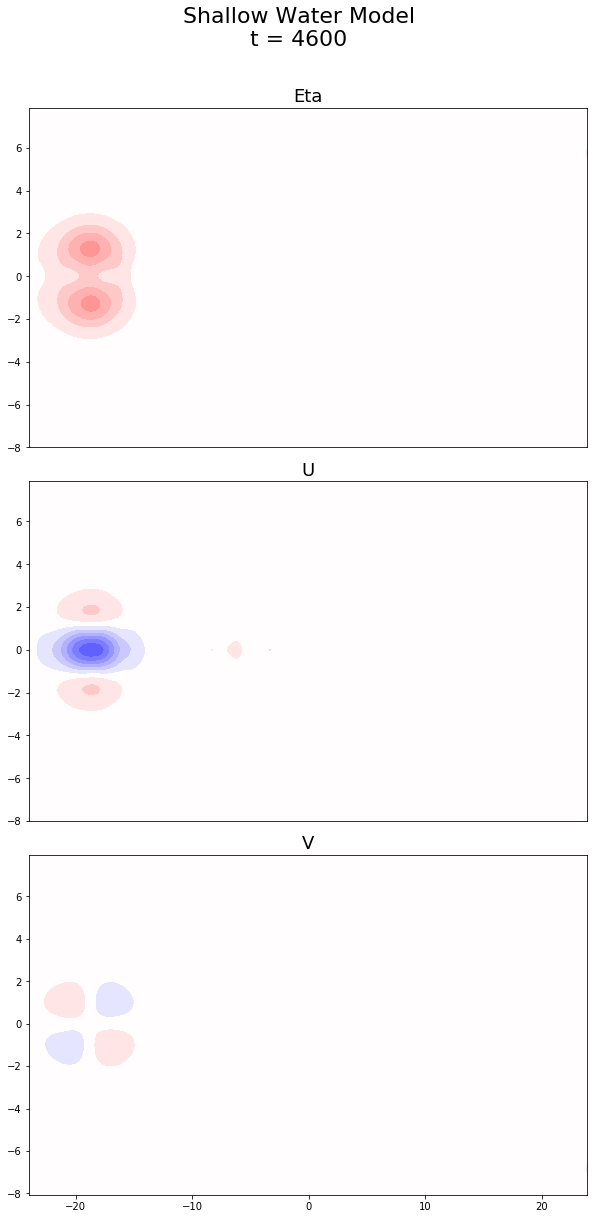

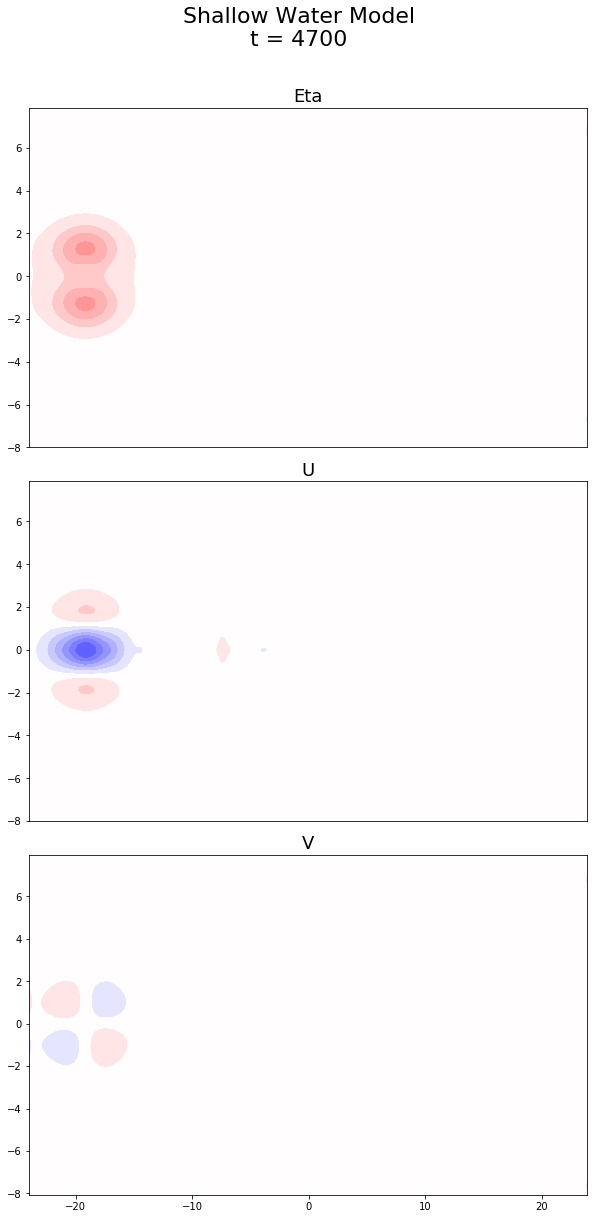

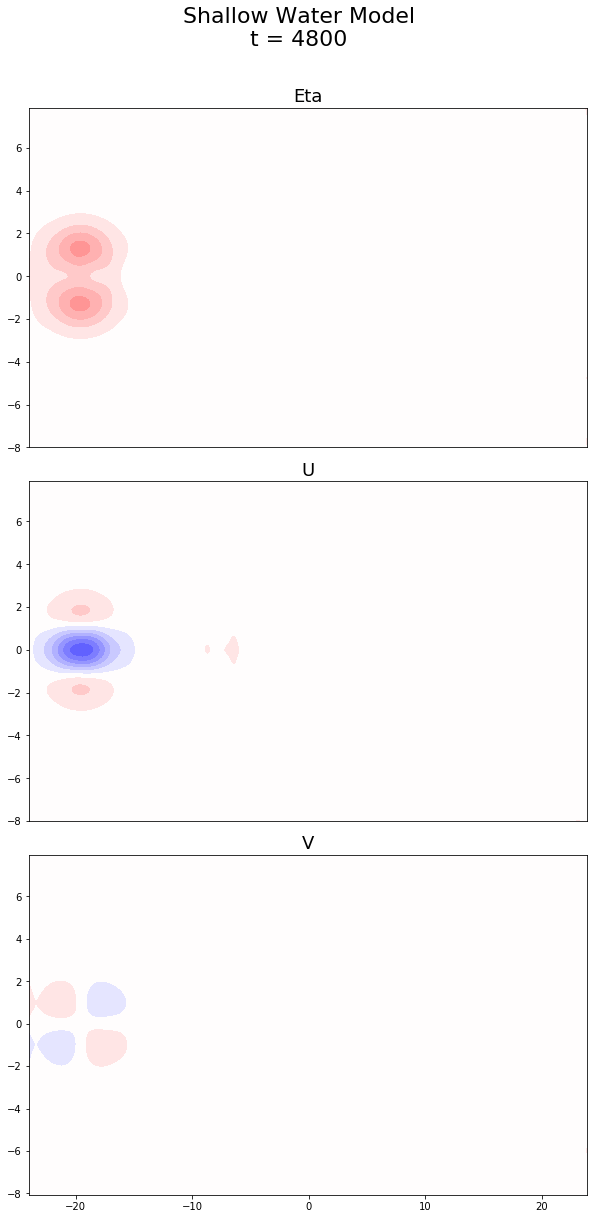

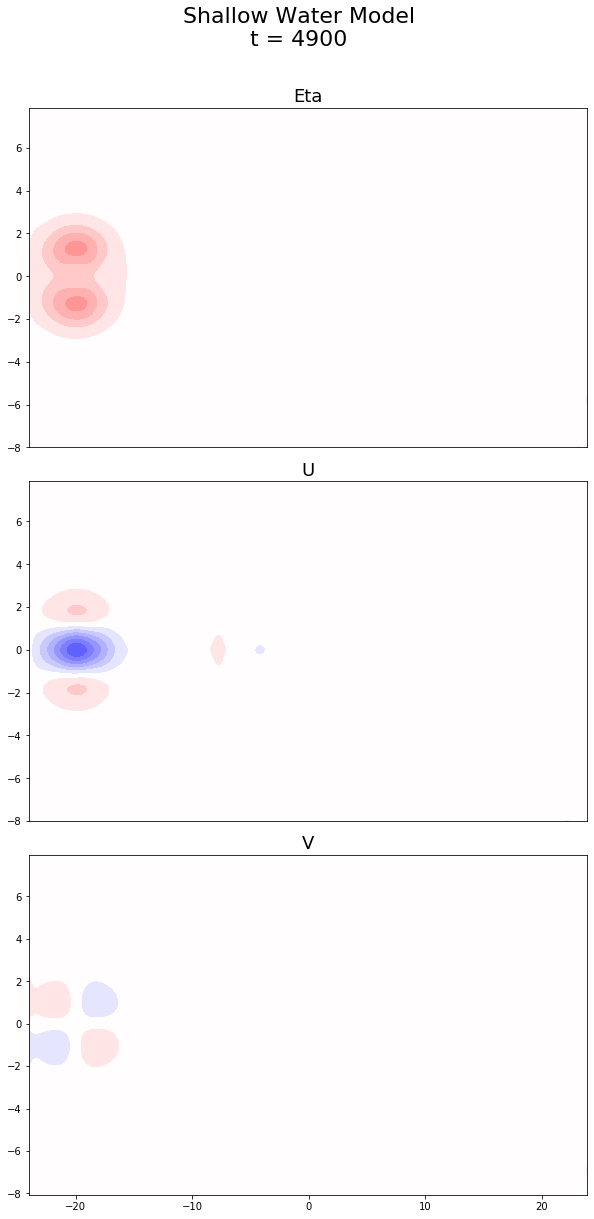

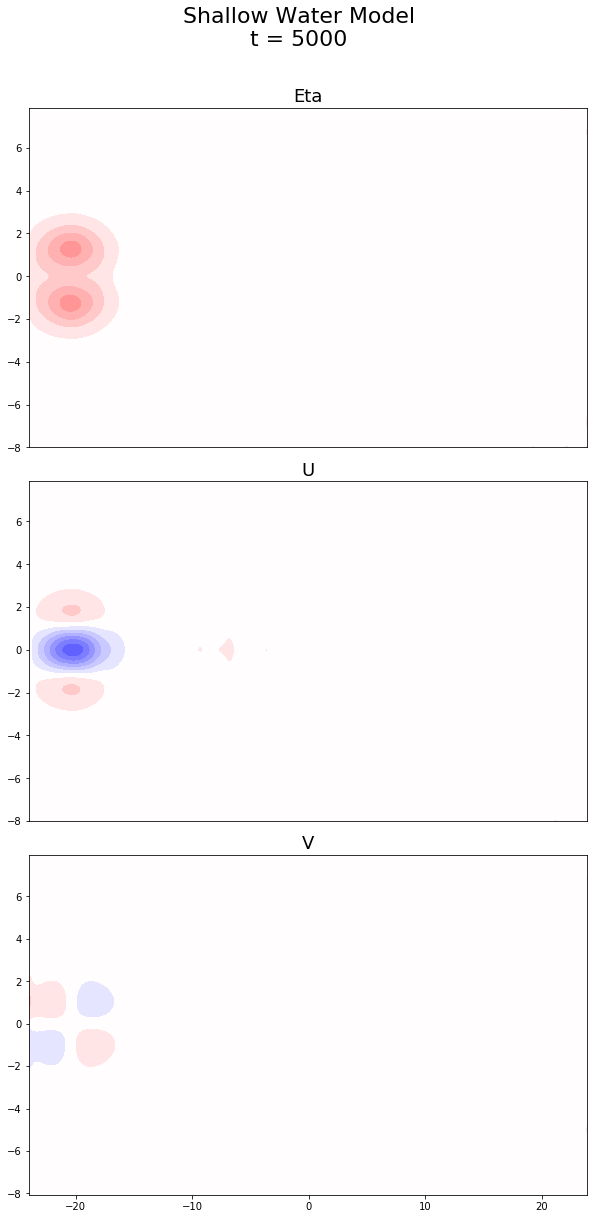

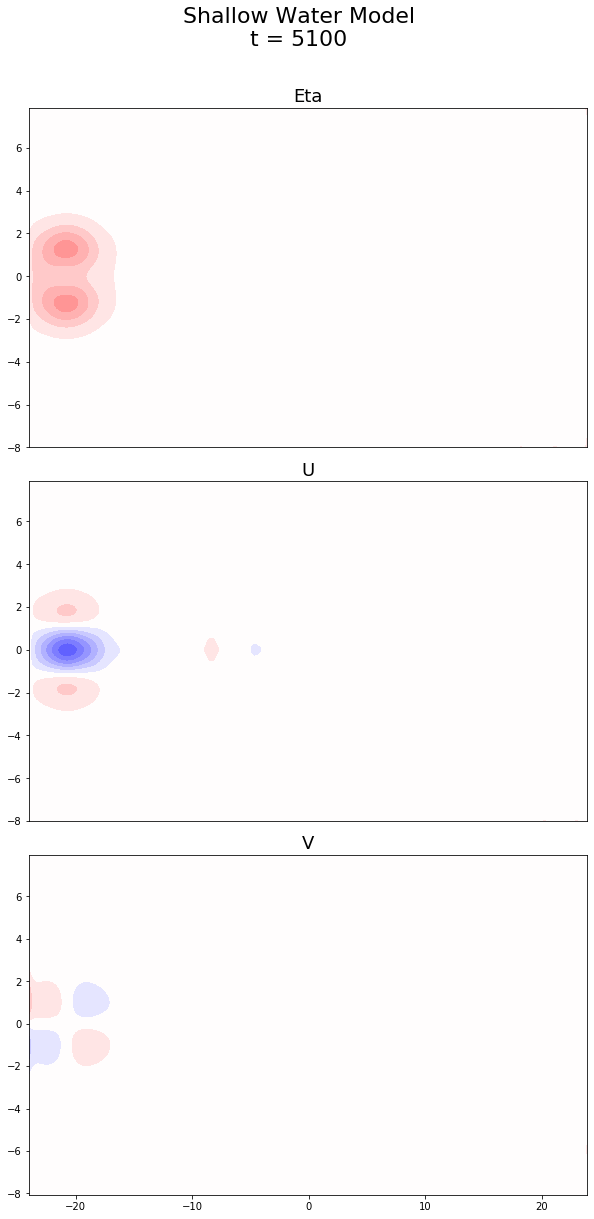

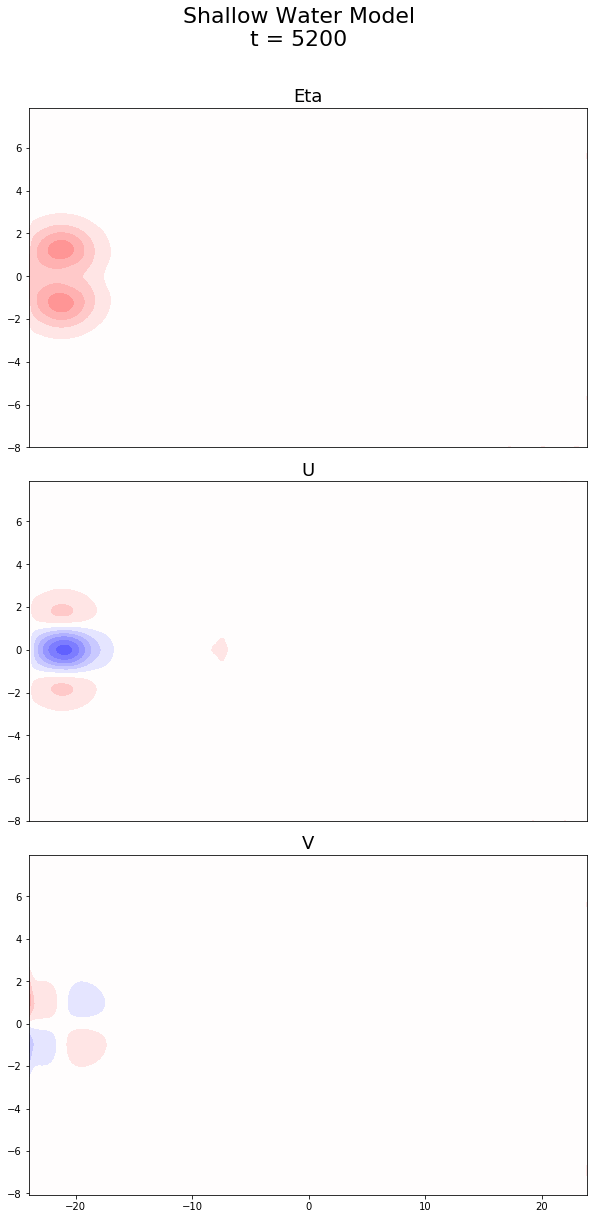

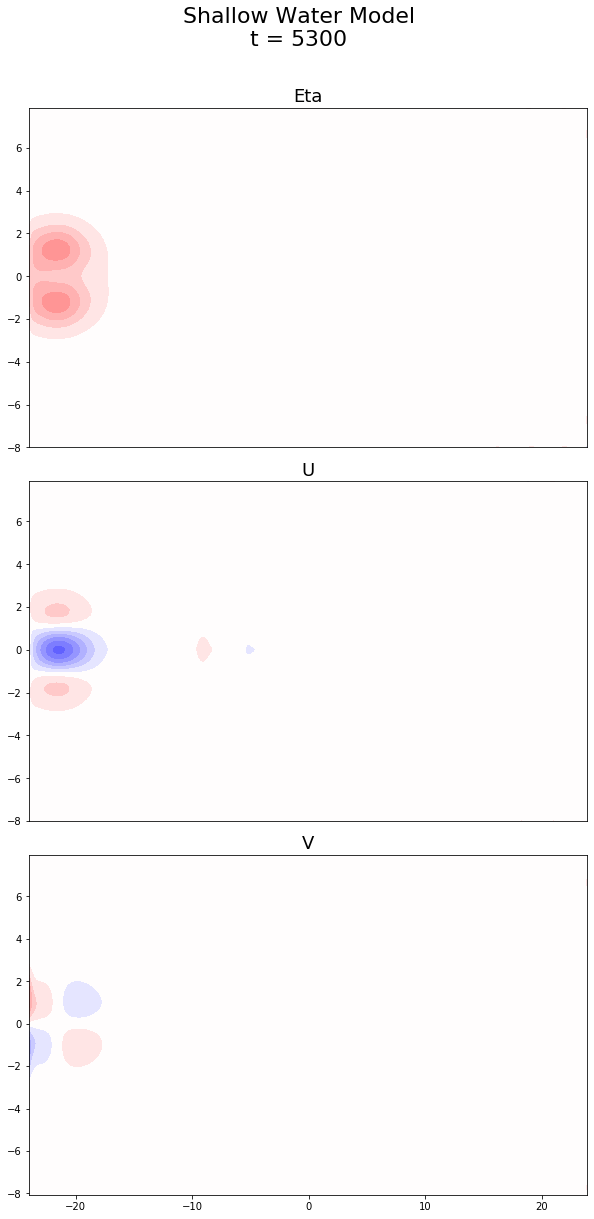

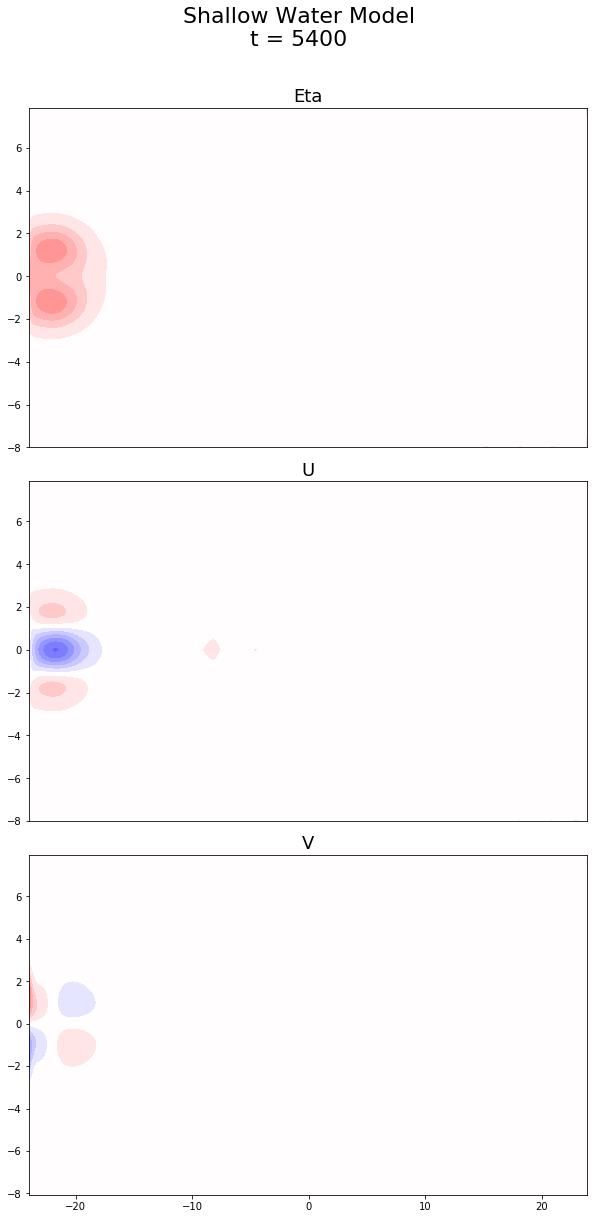

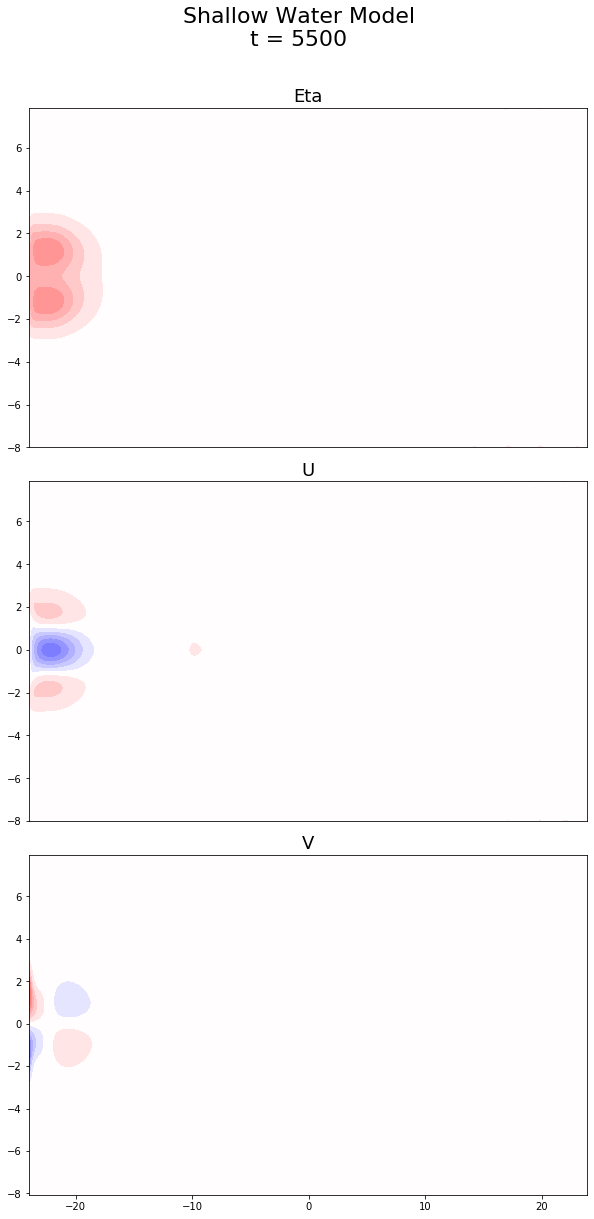

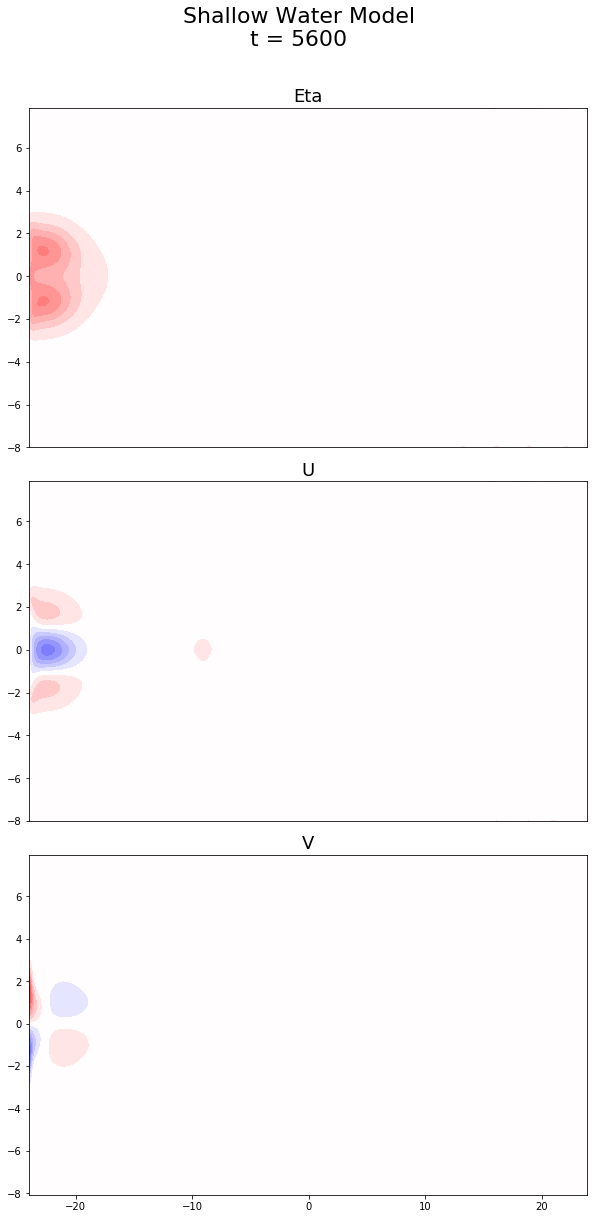

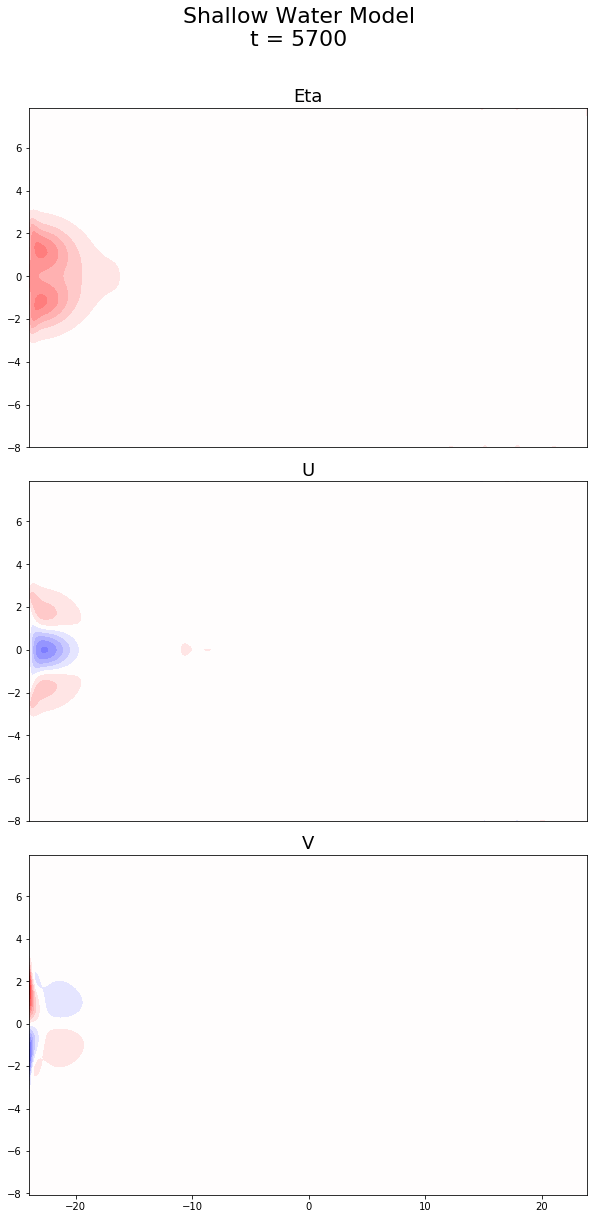

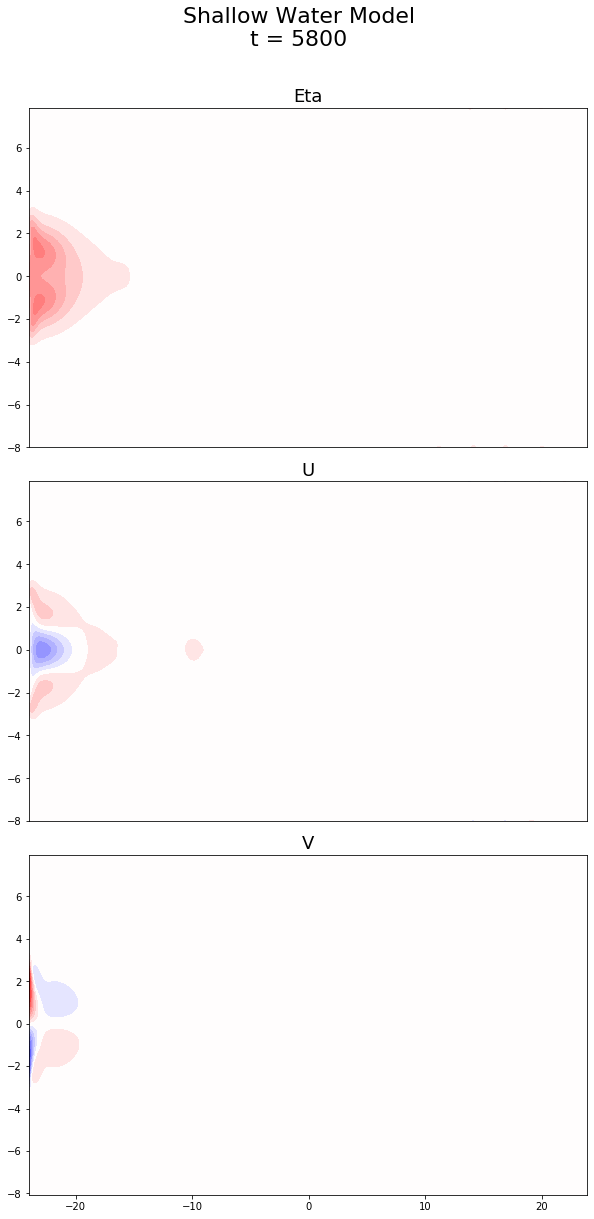

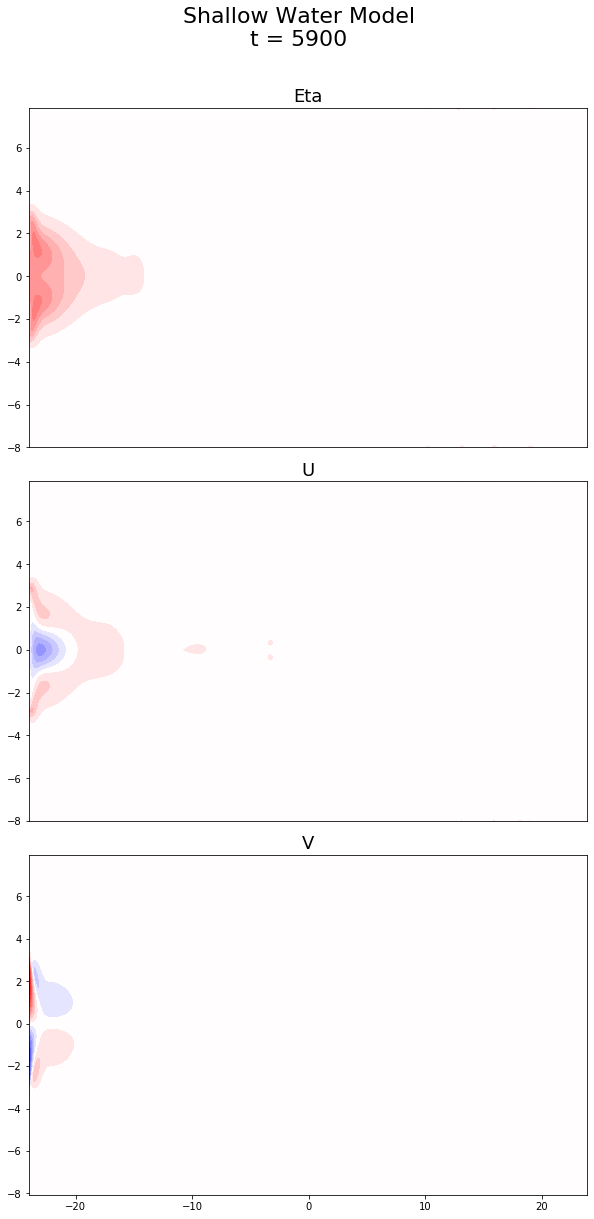

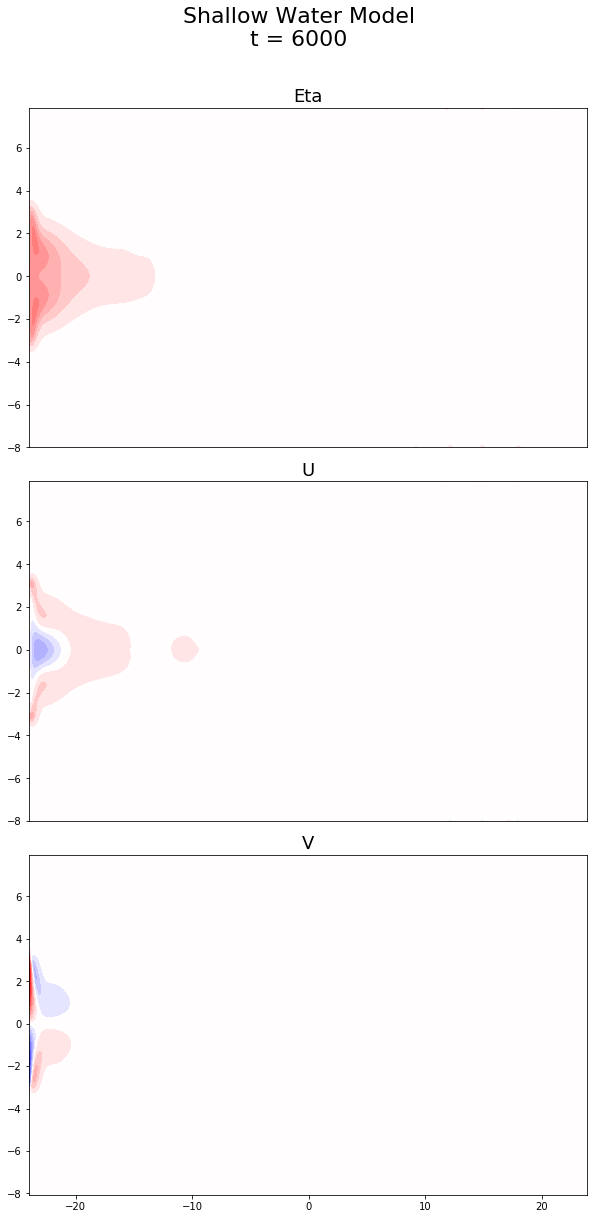

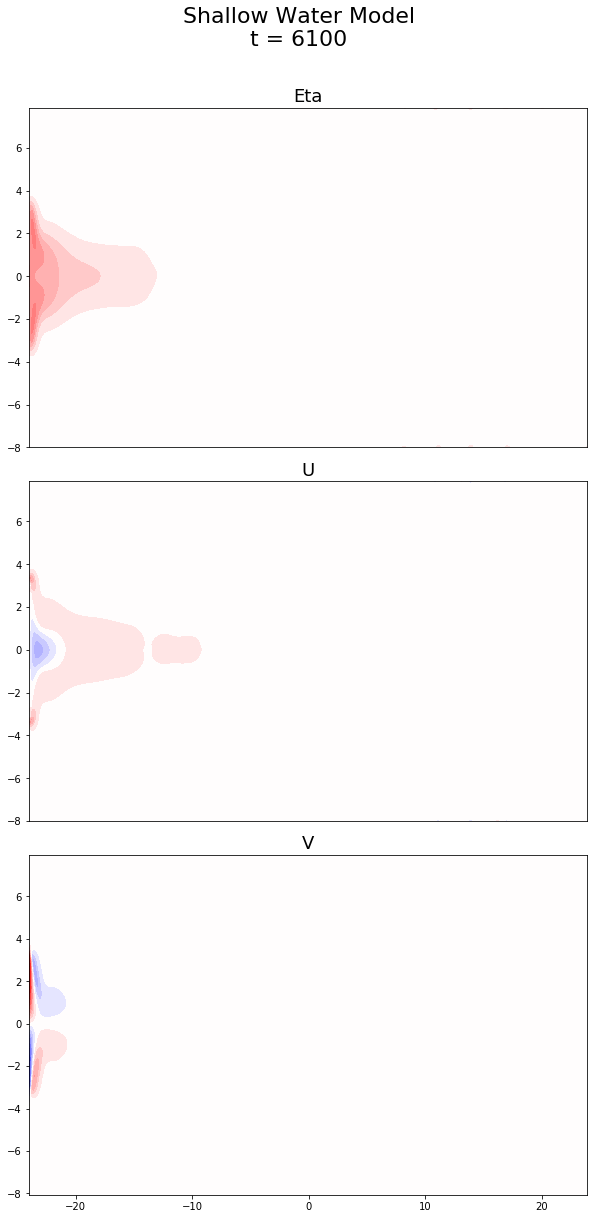

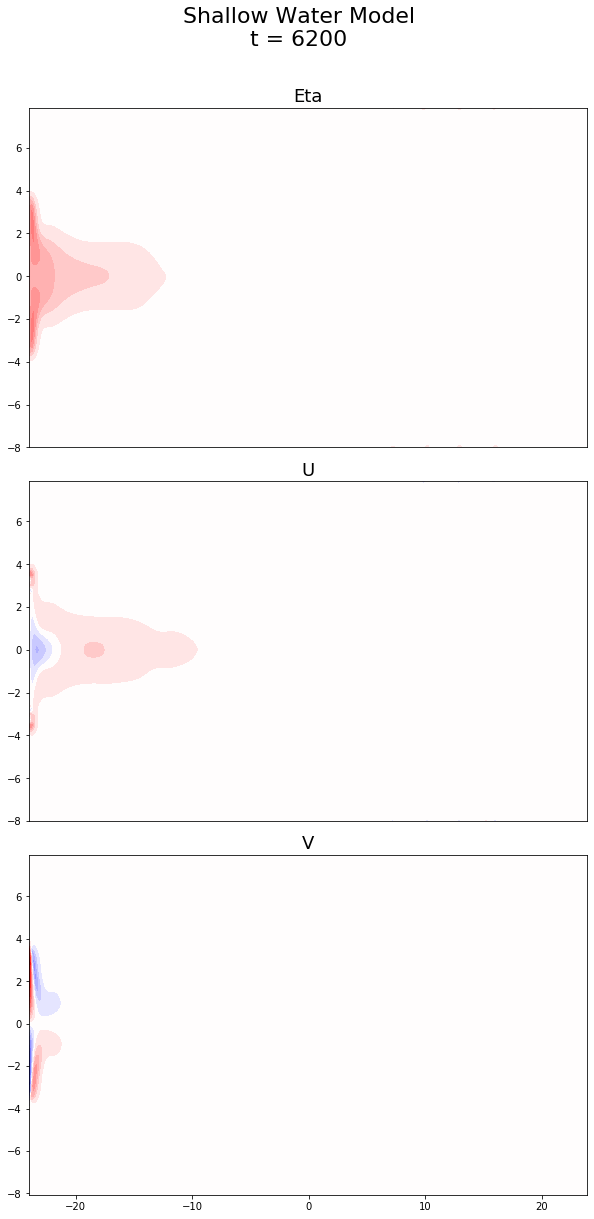

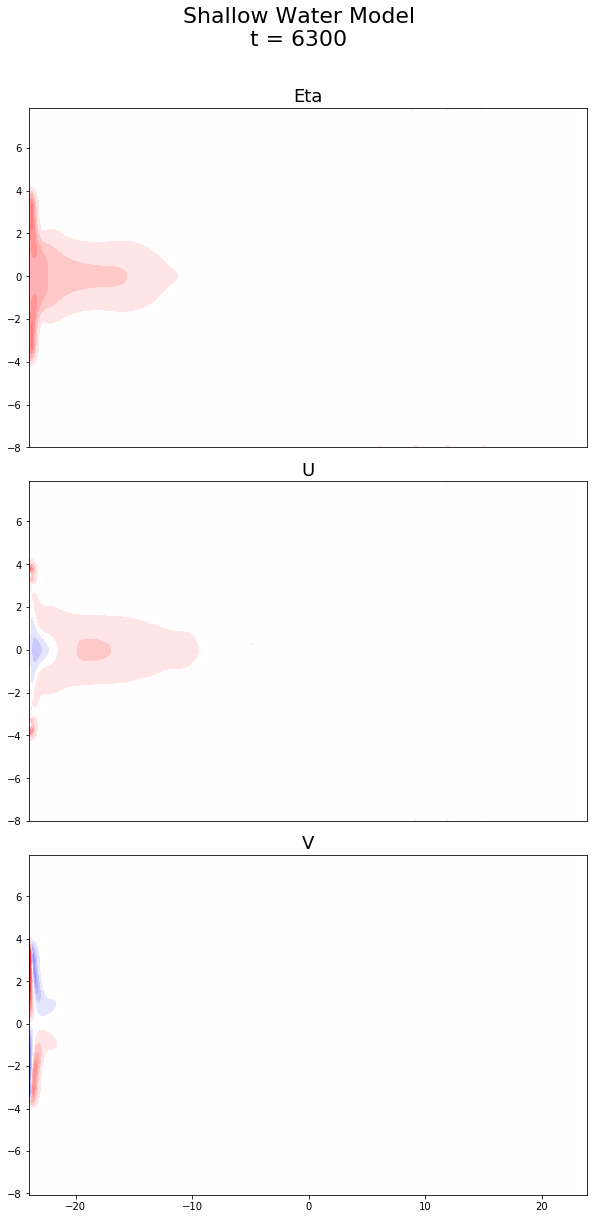

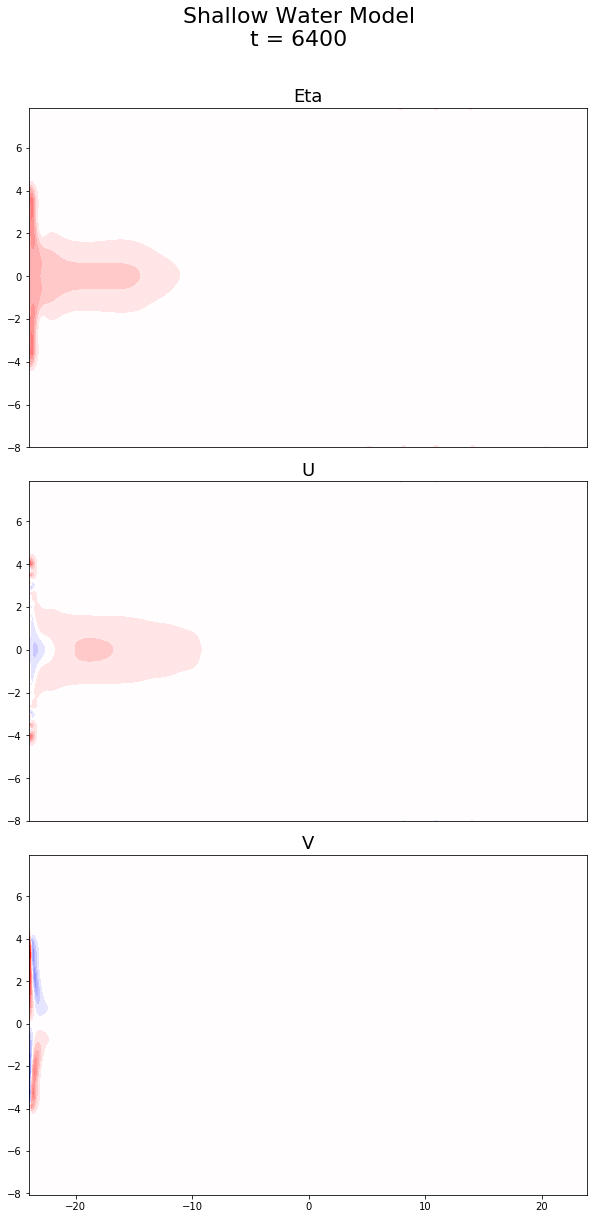

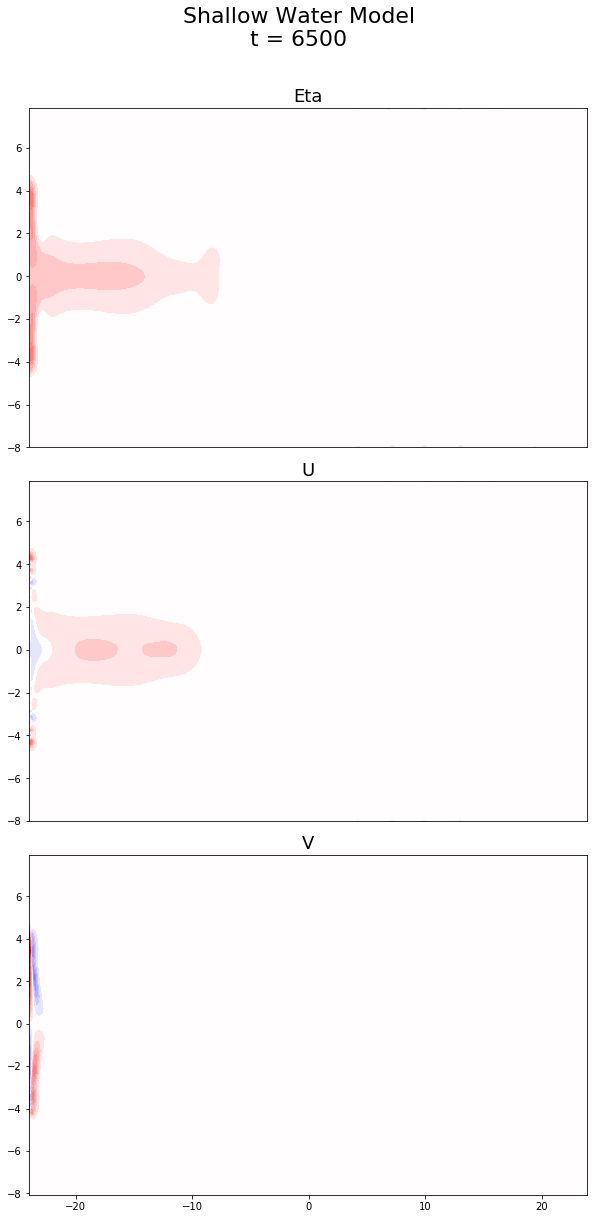

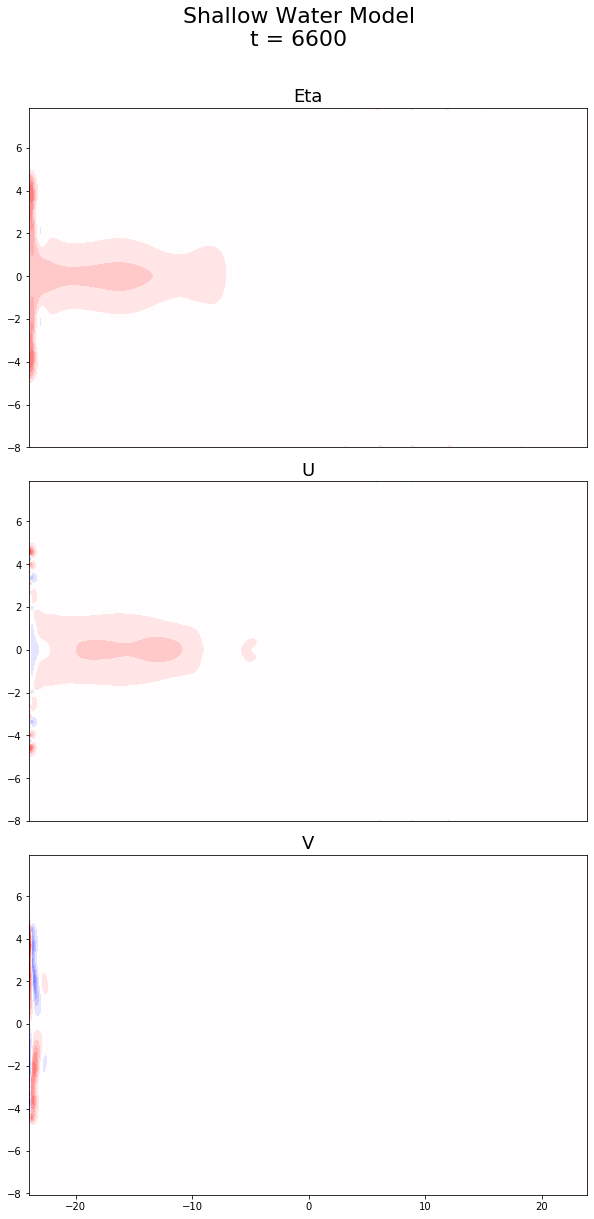

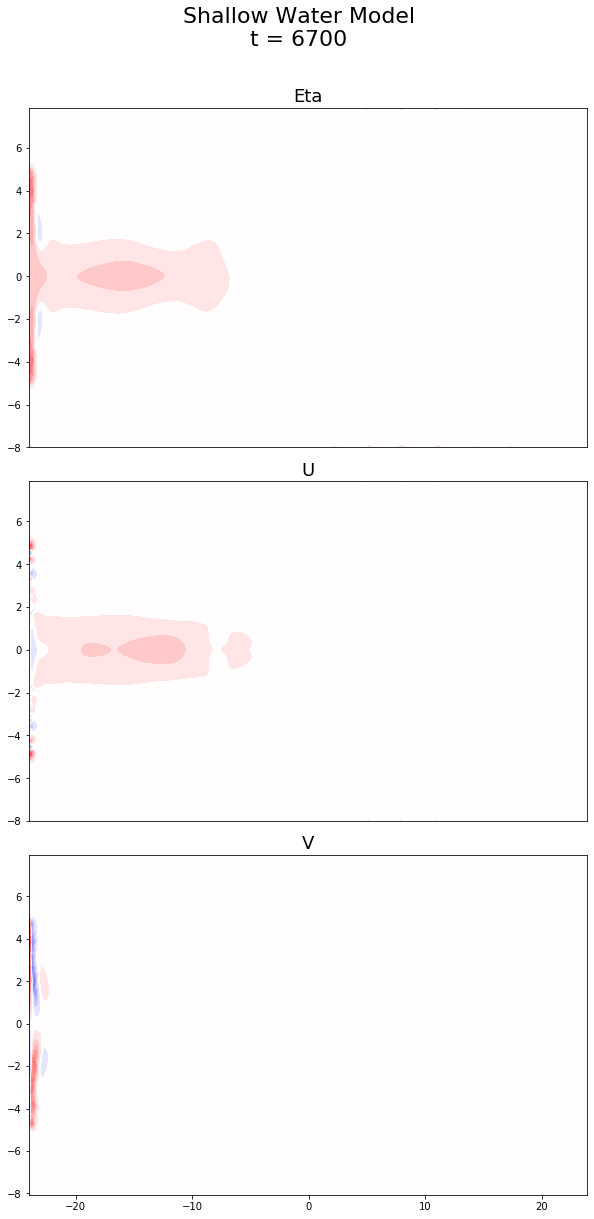

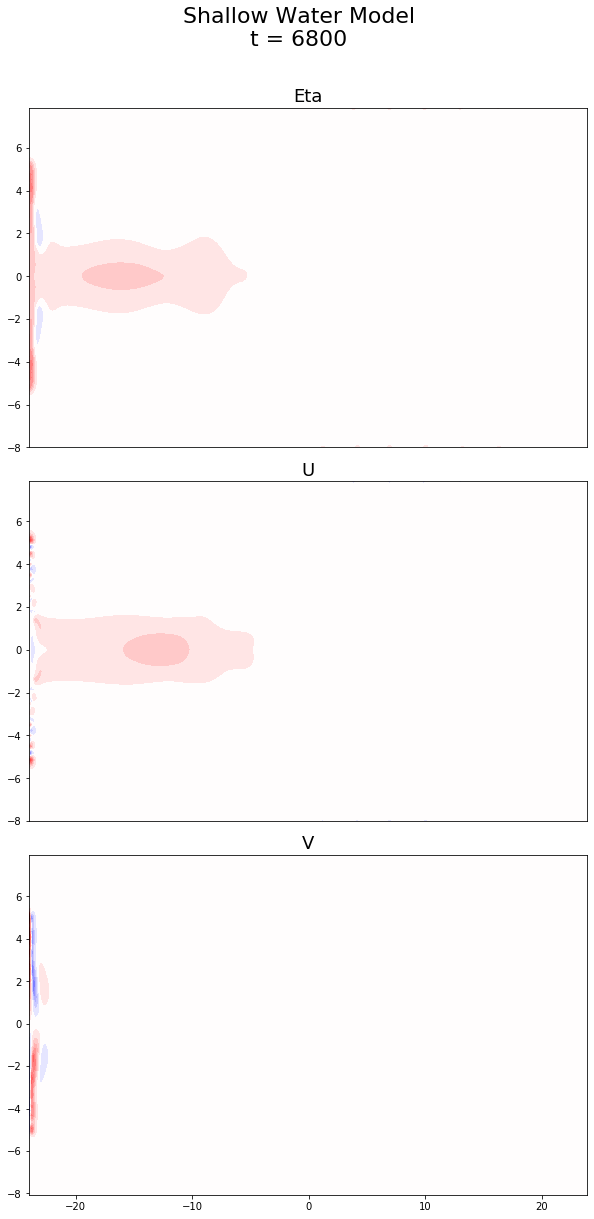

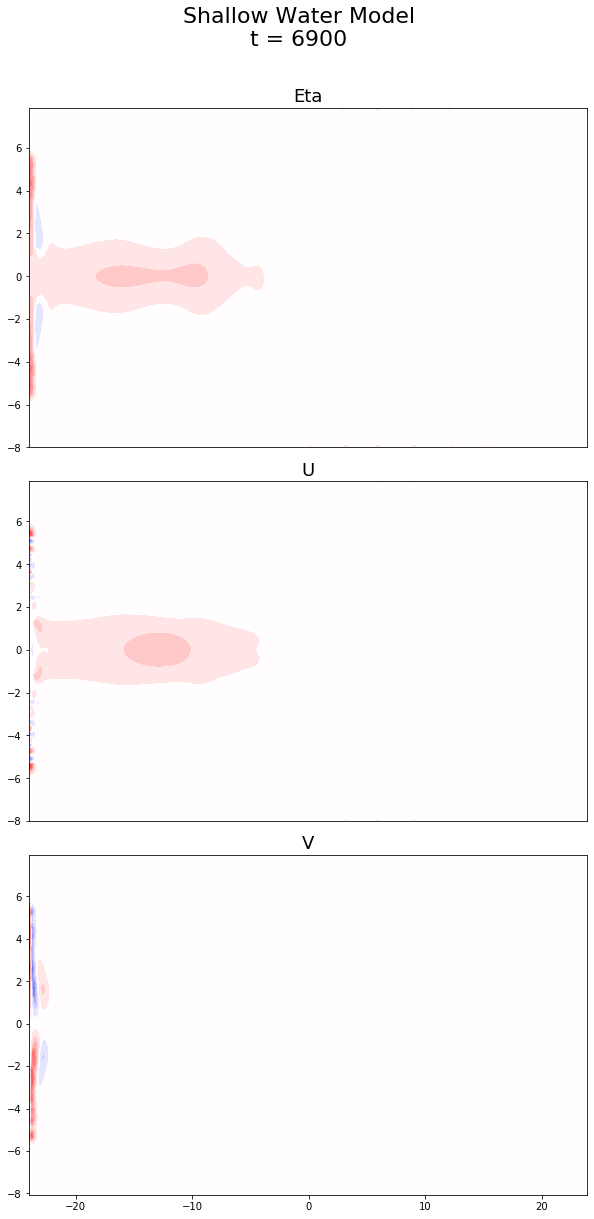

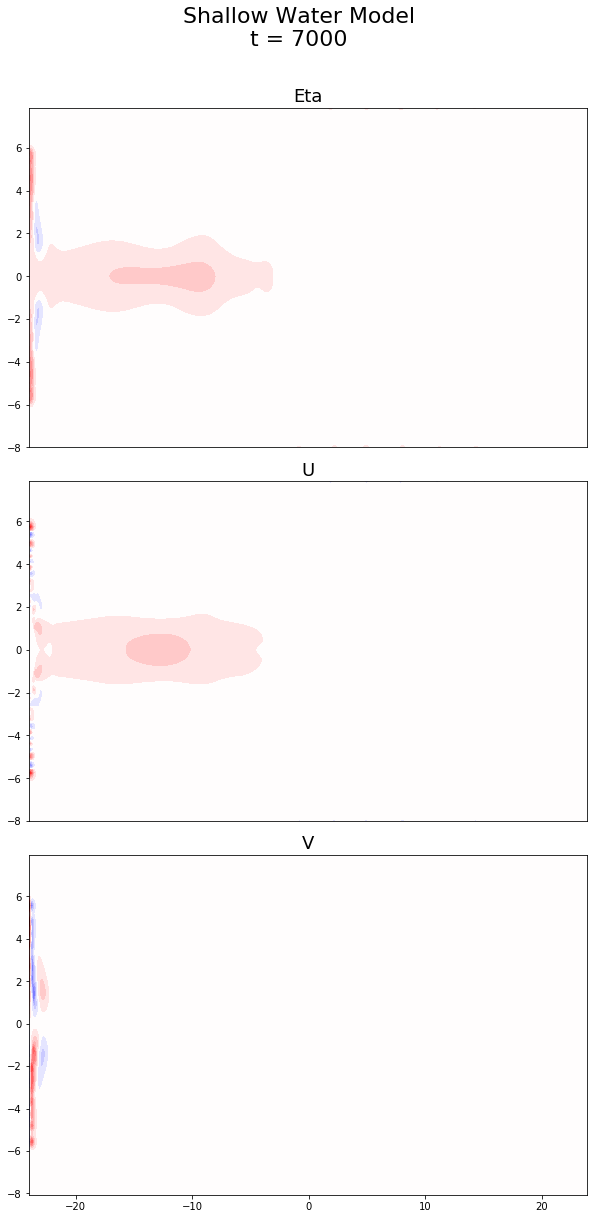

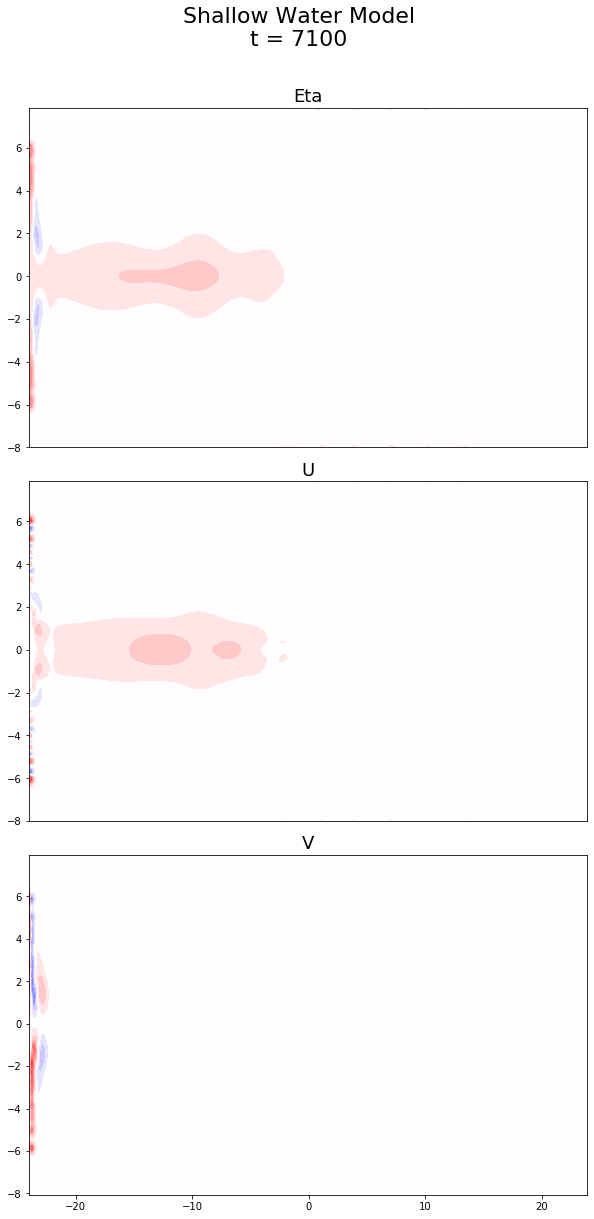

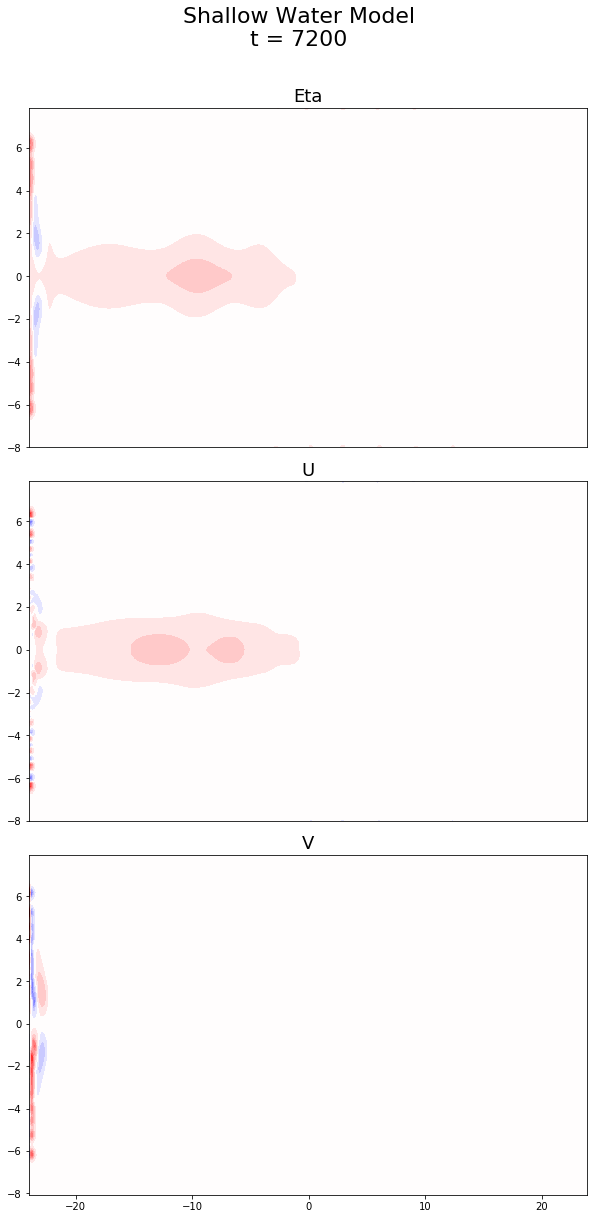

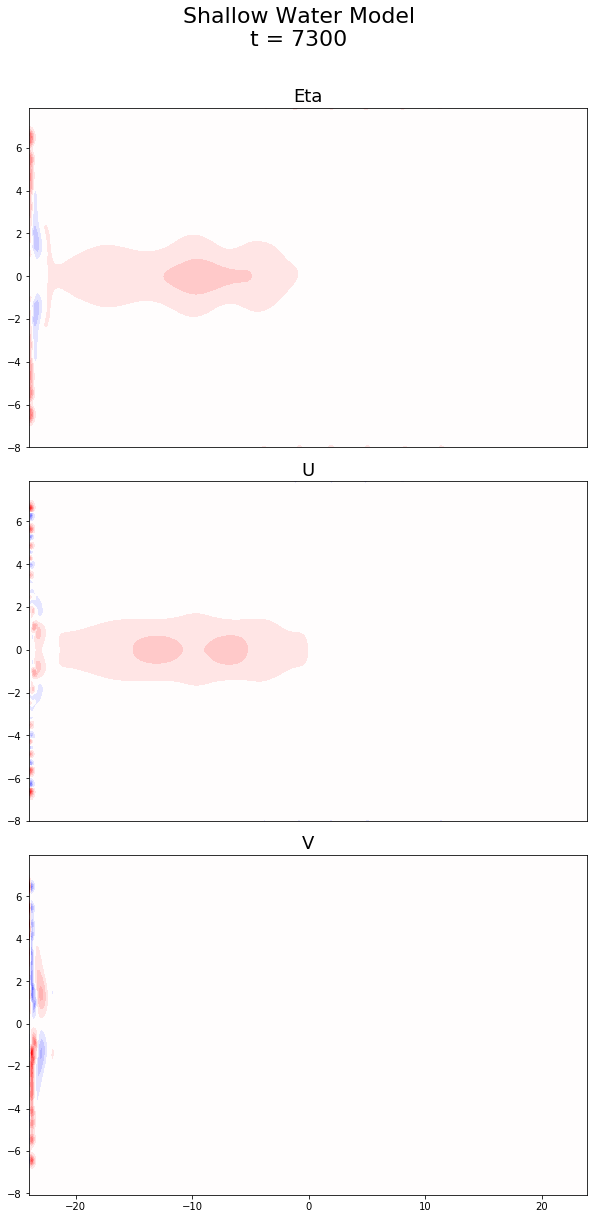

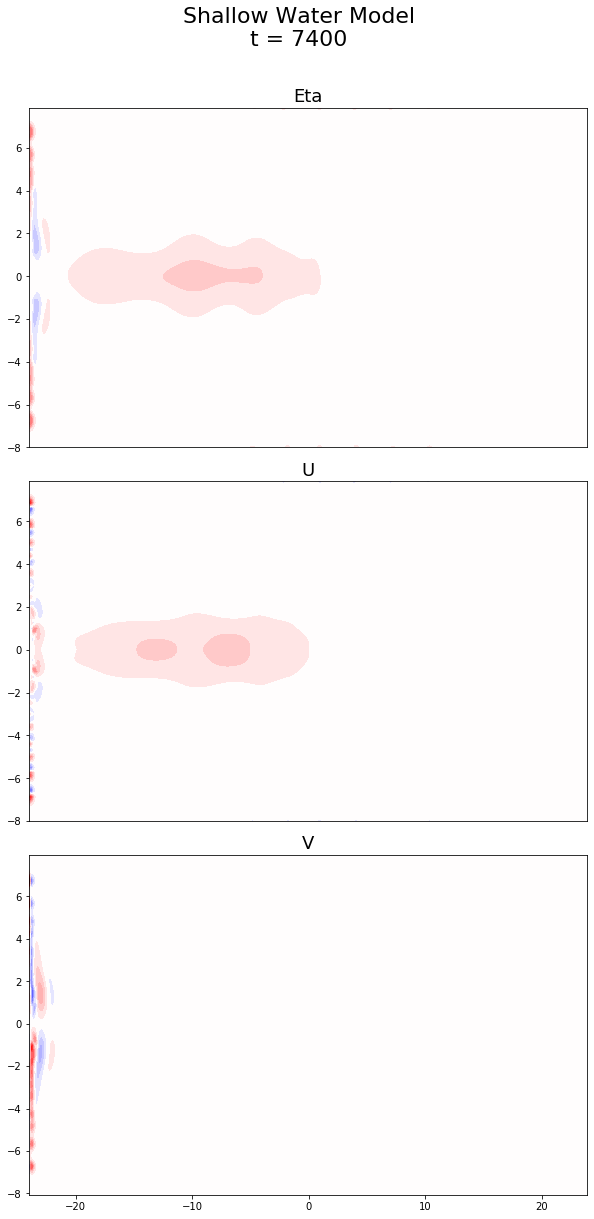

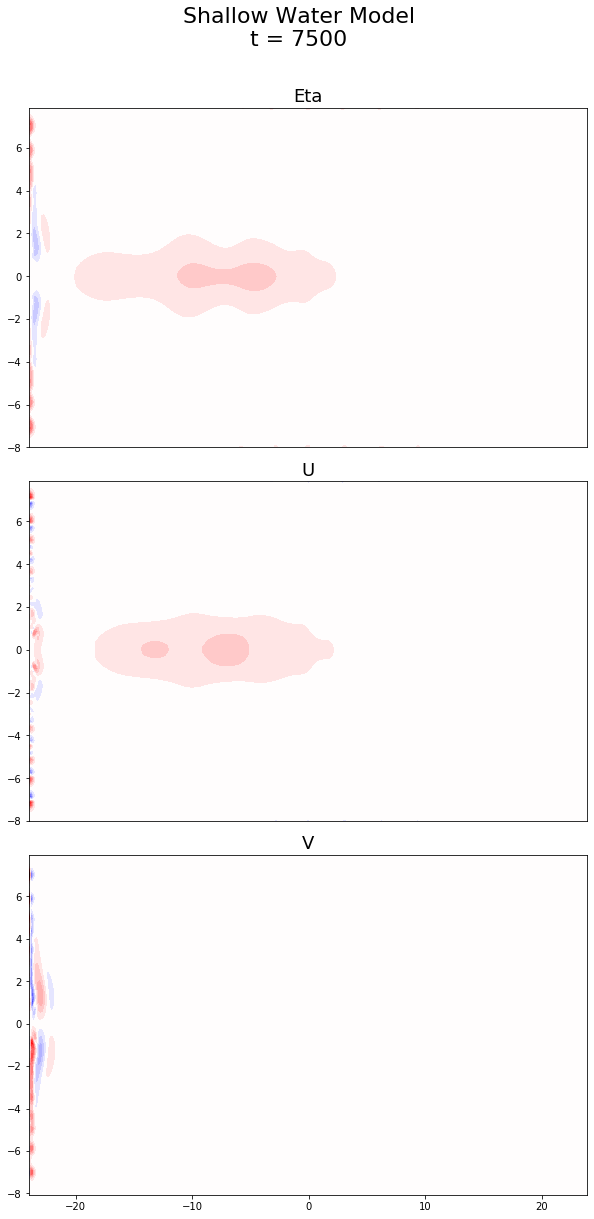

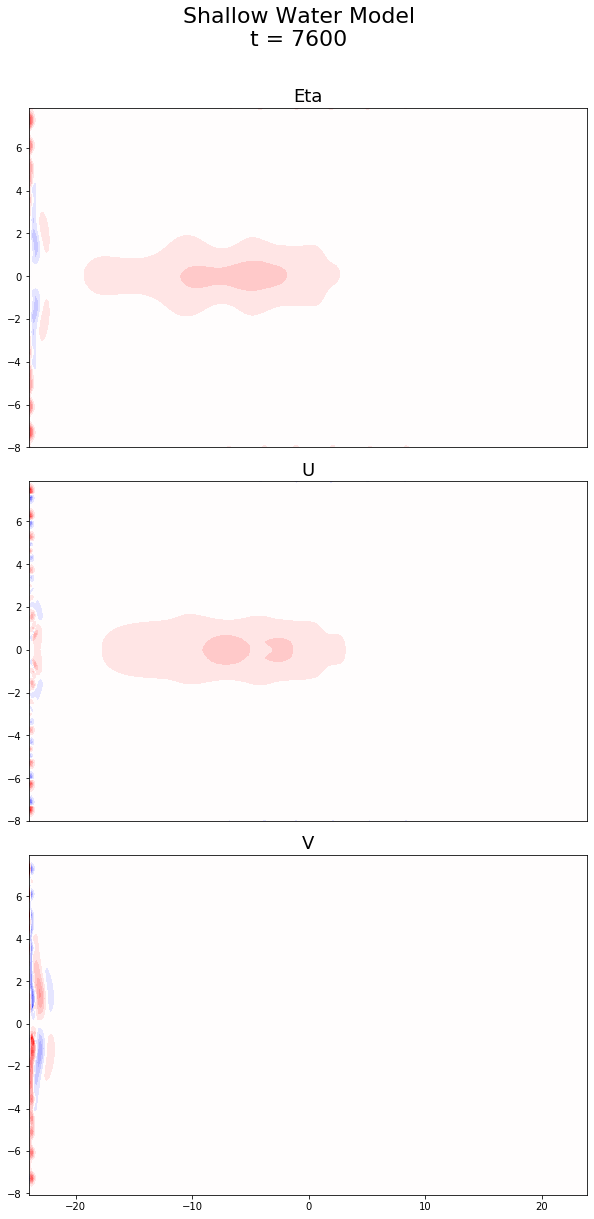

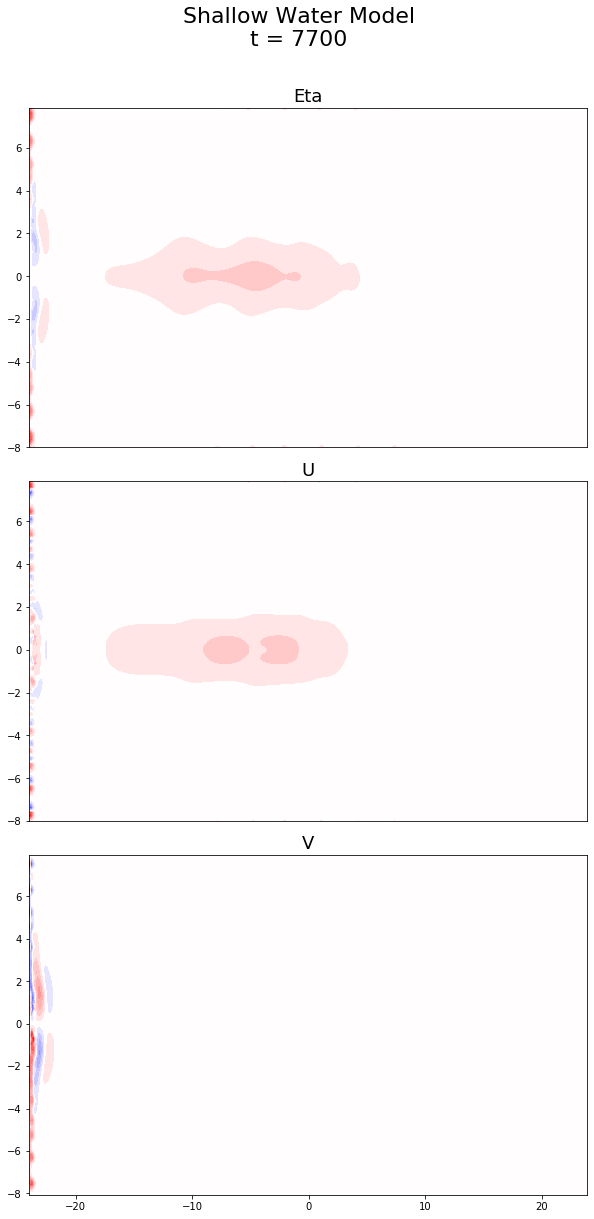

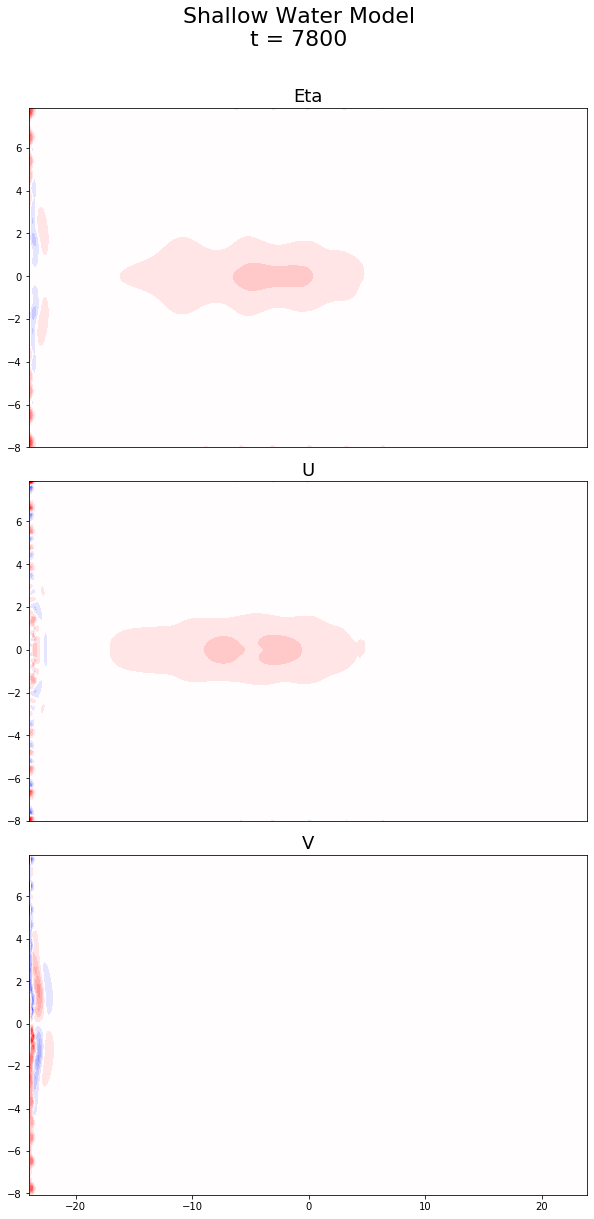

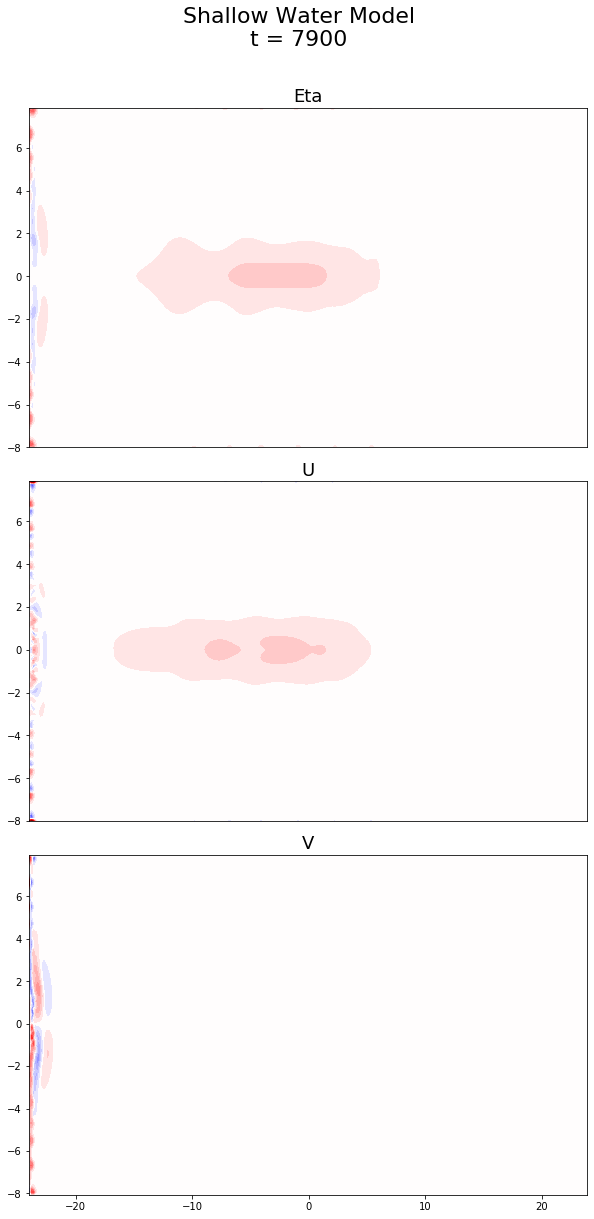

In [40]:
for it in range(nt-1):
    p[it+1],u[it+1],v[it+1] = RK3Step(p[it],u[it],v[it],f,depth,g,dxx,dyy,dt)
    BC(u[it+1],v[it+1])
    #print(u[it+1,:,-1])
    if (it%snapfreq == 0):
        # diagnostics
        V,energy,enstrophy = calc_budget(p[it+1],u[it+1],v[it+1],depth+p[it+1],f,g,dxx,dyy)
        print(it+1)
        print('\u0394Energy: ',np.max(energy)-np.max(energy0))
        print('\u0394Enstrophy: ',np.max(enstrophy)-np.max(enstrophy0))
        print('\u0394Volume: ',np.max(V)-np.max(V0))

        # plot solution
        UpdatePlots(it,p[it+1],u[it+1],v[it+1],XP,YP,XU,YU,XV,YV)